In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
fd =  pd.read_csv('../data/faults_diagnostics.csv')

In [3]:
fd = fd.drop(columns = ['Unnamed: 0', 'ecuSoftwareVersion', 'ecuSerialNumber', 'LocationTimeStamp'])

In [4]:
fd.head(3).T

,0,1,2
FaultId,1,2,3
AcceleratorPedal,0.0,9.2,9.2
BarometricPressure,14.21,14.355,14.355
CruiseControlActive,False,unknown,unknown
CruiseControlSetSpeed,66.48672,NaN,NaN
DistanceLtd,423178.7,368419.3,368419.3
EngineCoolantTemperature,100.4,181.4,181.4
EngineLoad,11.0,18.0,18.0
EngineOilPressure,0.0,36.54,36.54
EngineOilTemperature,96.74375,201.0875,201.0875


In [5]:
fd['spnfmi']= fd['spn'].astype('str')+'-'+fd['fmi'].astype('str')

In [6]:
fd['EventTimeStamp'] = pd.to_datetime(fd['EventTimeStamp'])

In [7]:
#Get Earliest timestamp (first timestamp) for each equipment
fdmin = fd.groupby('EquipmentID').min().reset_index(drop=False)[['EquipmentID', 'EventTimeStamp']]

fdmin.rename(columns = {'EventTimeStamp':'earliest'}, inplace = True)
fdmin

<ipython-input-7-40c086777482>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  fdmin = fd.groupby('EquipmentID').min().reset_index(drop=False)[['EquipmentID', 'EventTimeStamp']]


,EquipmentID,earliest
0,301,2015-05-11 13:11:20
1,302,2010-12-31 23:04:15
2,303,2015-09-28 05:44:15
3,304,2015-02-23 06:26:46
4,305,2015-02-21 12:18:36
...,...,...
1035,2375,2020-01-22 12:13:07
1036,2376,2020-01-08 10:30:42
1037,2377,2020-01-14 13:42:34
1038,2380,2020-03-04 10:06:10


In [8]:
#Get Earliest mileage(first mileage) for each equipment
fdmindst = fd.groupby('EquipmentID').min().reset_index(drop=False)[['EquipmentID', 'DistanceLtd']]
fdmindst.rename(columns = {'DistanceLtd':'mindist'}, inplace = True)
fdmindst

<ipython-input-8-fc3ccb98e465>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  fdmindst = fd.groupby('EquipmentID').min().reset_index(drop=False)[['EquipmentID', 'DistanceLtd']]


,EquipmentID,mindist
0,301,120841.700000
1,302,133512.800000
2,303,56127.090000
3,304,43975.970000
4,305,97194.400000
...,...,...
1035,2375,6403.217285
1036,2376,7926.854004
1037,2377,7003.916016
1038,2380,511.711578


In [9]:
fd = pd.merge(fd, fdmin, on = 'EquipmentID', how = 'left')
fd = pd.merge(fd, fdmindst, on = 'EquipmentID', how = 'left')

In [10]:
#calculate number of days since the earliest record for each equipment
fd['days_ct'] = (fd['EventTimeStamp'] - fd['earliest']).dt.days
fd['days_ct']

0             0
1             0
2             0
3             0
4             0
           ... 
1054108     296
1054109    1269
1054110    1520
1054111      52
1054112      52
Name: days_ct, Length: 1054113, dtype: int64

In [11]:
#calculate distance traveled since the earliest record for each equipment
fd['dis_trav'] = (fd['DistanceLtd'] - fd["mindist"])

In [12]:
fd['spnfmi'].value_counts()

111-17     304457
929-9      227766
96-3        76821
829-3       76608
111-18      35722
            ...  
3226-11         1
100-3           1
3363-7          1
5848-13         1
3480-3          1
Name: spnfmi, Length: 988, dtype: int64

In [13]:
fd[fd['spn'] == 5246][['spn', 'fmi']]

,spn,fmi
1799,5246,0
2588,5246,0
5131,5246,0
5226,5246,0
5937,5246,0
...,...,...
1047327,5246,0
1049347,5246,0
1049361,5246,0
1049596,5246,19


In [14]:
fd['full_drt'] = fd['spn'].apply(lambda x: True if x==5246 else False)

In [15]:
#side exploration

fdsort = fd.sort_values(by=['EquipmentID', 'days_ct'])
fdsort

,FaultId,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,EquipmentID,MCTNumber,Latitude,Longitude,spnfmi,earliest,mindist,days_ct,dis_trav,full_drt
43654,49415,14.4,13.9200,False,0.00000,120841.700000,185.0,18.0,55.10,193.6062,...,301,105431712,36.189398,-82.795601,639-2,2015-05-11 13:11:20,120841.700000,0,0.000000,False
45401,51363,89.6,14.4275,False,0.00000,121687.100000,186.8,38.0,52.78,217.1750,...,301,105431712,35.872500,-84.475648,596-31,2015-05-11 13:11:20,120841.700000,1,845.400000,False
49950,57330,0.0,14.3550,False,0.00000,123057.100000,185.0,0.0,55.68,213.9688,...,301,105431712,35.972870,-83.920555,3226-10,2015-05-11 13:11:20,120841.700000,6,2215.400000,False
53988,61706,12.0,14.5725,False,0.00000,124496.500000,183.2,14.0,51.62,196.7000,...,301,105431712,36.384953,-86.478379,639-2,2015-05-11 13:11:20,120841.700000,10,3654.800000,False
54080,61801,9.2,14.3550,unknown,NaN,368419.300000,181.4,18.0,36.54,201.0875,...,301,105431712,36.384814,-86.478379,639-2,2015-05-11 13:11:20,120841.700000,10,247577.600000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054111,1248457,1.6,14.4275,False,67.72946,28606.656250,181.4,0.0,27.26,221.7312,...,2377,108605700,35.030925,-85.321527,111-18,2020-01-14 13:42:34,7003.916016,52,21602.740234,False
1054112,1248458,9.2,14.3550,unknown,NaN,368419.300000,181.4,18.0,36.54,201.0875,...,2377,108605700,35.027314,-85.323472,111-18,2020-01-14 13:42:34,7003.916016,52,361415.383984,False
1053453,1247712,0.0,14.2825,False,0.00000,511.711578,167.0,12.0,30.74,165.6500,...,2380,108616776,35.491620,-86.434074,1761-17,2020-03-04 10:06:10,511.711578,0,0.000000,False
1054077,1248422,0.0,14.2825,False,67.72946,1058.216797,156.2,16.0,27.26,178.0250,...,2381,108616503,33.612638,-84.384444,37-18,2020-03-06 11:56:38,1058.216797,0,0.000000,False


In [16]:
fdsort.groupby('EquipmentID')['full_drt'].value_counts().head(40)

EquipmentID  full_drt
301          False        798
             True           1
302          False       3123
             True           6
303          False       1419
304          False       2213
             True           2
305          False       4926
             True          28
306          False        278
             True           1
307          False       1327
308          False        247
309          False       4151
310          False        674
1327         False          8
1328         False         40
1329         False         65
             True           2
1330         False         60
1331         False        809
1332         False         67
1333         False         39
1334         False         70
1335         False        129
1336         False         37
1337         False        207
1338         False        124
1339         False         77
             True           1
1340         False        376
1341         False       1093
1342         False

In [17]:
fdsort.head(10).T

,43654,45401,49950,53988,54080,60094,60495,72950,72969,79815
FaultId,49415,51363,57330,61706,61801,68495,68953,83119,83139,90793
AcceleratorPedal,14.4,89.6,0.0,12.0,9.2,0.0,67.2,10.8,9.2,76.4
BarometricPressure,13.92,14.4275,14.355,14.5725,14.355,14.355,13.92,14.4275,14.355,14.21
CruiseControlActive,False,False,False,False,unknown,unknown,False,False,unknown,False
CruiseControlSetSpeed,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0
DistanceLtd,120841.7,121687.1,123057.1,124496.5,368419.3,392138.0,125989.2,129342.4,368419.3,131495.0
EngineCoolantTemperature,185.0,186.8,185.0,183.2,181.4,181.4,183.2,181.4,181.4,186.8
EngineLoad,18.0,38.0,0.0,14.0,18.0,15.0,68.0,10.0,18.0,27.0
EngineOilPressure,55.1,52.78,55.68,51.62,36.54,33.06,51.62,53.94,36.54,53.94
EngineOilTemperature,193.6062,217.175,213.9688,196.7,201.0875,199.7375,215.2063,201.7063,201.0875,217.9063


In [18]:
#Question: How many errors are thrown out before a derate on average

#cumulative faults
fdsort['cumulative_faults'] = fdsort.groupby('EquipmentID').cumcount()

In [19]:
fdsort[fdsort['full_drt']==True]['cumulative_faults'].sort_values(ascending = True)

1045819        0
336636         1
396283         1
6613           1
5131           1
           ...  
926420      9808
836804     10130
836834     10131
837514     10140
837518     10141
Name: cumulative_faults, Length: 933, dtype: int64

Text(0, 0.5, 'Frequency')

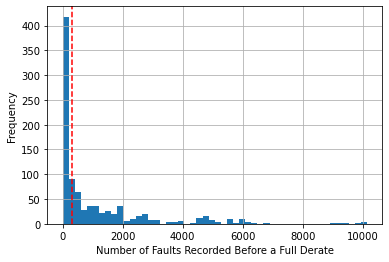

In [20]:
ax = fdsort[fdsort['full_drt']==True]['cumulative_faults'].hist(bins = 50)
ax.axvline(x= fdsort[fdsort['full_drt']==True]['cumulative_faults'].quantile(q=0.5), color='r', linestyle='--')
plt.xlabel('Number of Faults Recorded Before a Full Derate')
plt.ylabel('Frequency')


The graph shows the distribution for the number of faults recorded before a full derate. The median number of faults before a full derate is 317. 
50% of full derates show 1-317 derates. 

In [21]:
cumul = pd.DataFrame(fdsort[fdsort['full_drt']==True]['cumulative_faults'].sort_values(ascending = True))
cumul = cumul.reset_index(drop = True)
cumul

,cumulative_faults
0,0
1,1
2,1
3,1
4,1
...,...
928,9808
929,10130
930,10131
931,10140


Text(0.5, 1.0, 'Cumulative Frequency Plot')

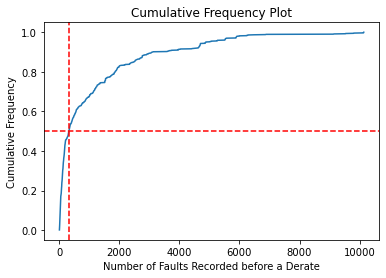

In [22]:
cum_freq = cumul['cumulative_faults'].value_counts(normalize = True).sort_index().cumsum()
ax = cum_freq.plot(kind = 'line')

ax.axvline(x= cumul['cumulative_faults'].quantile(q=0.5), color='r', linestyle='--')
ax.axhline(y=0.5, color = 'r', linestyle= '--', label = 'b')

plt.xlabel('Number of Faults Recorded before a Derate')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Frequency Plot')

In [23]:
cumul['cumulative_faults'].quantile(q=0.95)

4877.0

In [24]:
fdsort.groupby('cumulative_faults')['full_drt'].value_counts()

cumulative_faults  full_drt
0                  False       1039
                   True           1
1                  False       1034
                   True           5
2                  False       1034
                               ... 
15284              False          1
15285              False          1
15286              False          1
15287              False          1
15288              False          1
Name: full_drt, Length: 15945, dtype: int64

In [25]:
fdsort[fdsort['cumulative_faults'] ==1][['EquipmentID', 'spn', 'full_drt', 'cumulative_faults']]

,EquipmentID,spn,full_drt,cumulative_faults
45401,301,596,False,1
88,302,5444,False,1
196578,303,111,False,1
1942,304,3217,False,1
40,305,791,False,1
...,...,...,...,...
1043126,2374,111,False,1
1044015,2375,37,False,1
1040684,2376,111,False,1
1041992,2377,84,False,1


In [26]:
fdsort[fdsort['EquipmentID'] == 1339][['EquipmentID', 'spn', 'full_drt', 'cumulative_faults']].head(80)

,EquipmentID,spn,full_drt,cumulative_faults
490,1339,596,False,0
16835,1339,4364,False,1
17095,1339,627,False,2
17114,1339,627,False,3
18739,1339,4364,False,4
...,...,...,...,...
74848,1339,4363,False,73
74868,1339,4363,False,74
74902,1339,1569,False,75
75414,1339,5246,True,76


In [27]:
#further exploration: mode spn/fmi before full derates

In [28]:
#from the fault that occured right before it, how long until a full derate occured

In [29]:
fdsort

,FaultId,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,MCTNumber,Latitude,Longitude,spnfmi,earliest,mindist,days_ct,dis_trav,full_drt,cumulative_faults
43654,49415,14.4,13.9200,False,0.00000,120841.700000,185.0,18.0,55.10,193.6062,...,105431712,36.189398,-82.795601,639-2,2015-05-11 13:11:20,120841.700000,0,0.000000,False,0
45401,51363,89.6,14.4275,False,0.00000,121687.100000,186.8,38.0,52.78,217.1750,...,105431712,35.872500,-84.475648,596-31,2015-05-11 13:11:20,120841.700000,1,845.400000,False,1
49950,57330,0.0,14.3550,False,0.00000,123057.100000,185.0,0.0,55.68,213.9688,...,105431712,35.972870,-83.920555,3226-10,2015-05-11 13:11:20,120841.700000,6,2215.400000,False,2
53988,61706,12.0,14.5725,False,0.00000,124496.500000,183.2,14.0,51.62,196.7000,...,105431712,36.384953,-86.478379,639-2,2015-05-11 13:11:20,120841.700000,10,3654.800000,False,3
54080,61801,9.2,14.3550,unknown,NaN,368419.300000,181.4,18.0,36.54,201.0875,...,105431712,36.384814,-86.478379,639-2,2015-05-11 13:11:20,120841.700000,10,247577.600000,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054111,1248457,1.6,14.4275,False,67.72946,28606.656250,181.4,0.0,27.26,221.7312,...,108605700,35.030925,-85.321527,111-18,2020-01-14 13:42:34,7003.916016,52,21602.740234,False,12
1054112,1248458,9.2,14.3550,unknown,NaN,368419.300000,181.4,18.0,36.54,201.0875,...,108605700,35.027314,-85.323472,111-18,2020-01-14 13:42:34,7003.916016,52,361415.383984,False,13
1053453,1247712,0.0,14.2825,False,0.00000,511.711578,167.0,12.0,30.74,165.6500,...,108616776,35.491620,-86.434074,1761-17,2020-03-04 10:06:10,511.711578,0,0.000000,False,0
1054077,1248422,0.0,14.2825,False,67.72946,1058.216797,156.2,16.0,27.26,178.0250,...,108616503,33.612638,-84.384444,37-18,2020-03-06 11:56:38,1058.216797,0,0.000000,False,0


#Fault record that occured right before derate for each full derate (for an EquipmentID)

In [30]:
most_recent = fdsort[fdsort['full_drt'].shift(-1) == True]
most_recent

,FaultId,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,MCTNumber,Latitude,Longitude,spnfmi,earliest,mindist,days_ct,dis_trav,full_drt,cumulative_faults
466661,527156,0.0,14.3550,unknown,NaN,392138.0,181.4,15.0,33.06,199.73750,...,105431712,35.942407,-86.437314,3364-18,2015-05-11 13:11:20,120841.700,428,271296.300,False,122
1040078,1230352,0.0,14.6450,False,0.0,332899.0,174.2,9.0,29.00,181.17500,...,105418777,38.247407,-85.788009,3556-5,2010-12-31 23:04:15,133512.800,3292,199386.200,False,3048
1041586,1232083,0.0,14.3550,unknown,NaN,392138.0,181.4,15.0,33.06,199.73750,...,105418777,38.348287,-85.708888,609-12,2010-12-31 23:04:15,133512.800,3299,258625.200,False,3053
1041674,1232194,9.2,14.3550,unknown,NaN,368419.3,181.4,18.0,36.54,201.08750,...,105418777,38.192129,-85.857175,5246-19,2010-12-31 23:04:15,133512.800,3299,234906.500,True,3054
1043806,1235600,0.0,14.3550,unknown,NaN,392138.0,181.4,15.0,33.06,199.73750,...,105418777,38.349120,-85.708240,1213-5,2010-12-31 23:04:15,133512.800,3308,258625.200,False,3095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034570,1223102,25.2,14.3550,unknown,NaN,369586.5,185.0,28.0,36.54,208.45630,...,105329862,30.818472,-83.319861,5246-16,2018-11-05 10:39:48,8244.045,400,361342.455,True,22
1035374,1223981,99.2,14.5000,False,0.0,112657.4,183.2,77.0,35.96,226.28750,...,105329862,32.097592,-83.762916,5246-16,2018-11-05 10:39:48,8244.045,402,104413.355,True,23
1035459,1224112,25.2,14.3550,unknown,NaN,369586.5,185.0,28.0,36.54,208.45630,...,105329862,33.616666,-84.533379,5246-16,2018-11-05 10:39:48,8244.045,402,361342.455,True,24
1035503,1224156,28.8,14.1375,False,0.0,112819.3,174.2,14.0,40.02,192.98750,...,105329862,33.533611,-84.635601,5246-16,2018-11-05 10:39:48,8244.045,403,104575.255,True,25


In [31]:
most_recent.head().T

,466661,1040078,1041586,1041674,1043806
FaultId,527156,1230352,1232083,1232194,1235600
AcceleratorPedal,0.0,0.0,0.0,9.2,0.0
BarometricPressure,14.355,14.645,14.355,14.355,14.355
CruiseControlActive,unknown,False,unknown,unknown,unknown
CruiseControlSetSpeed,NaN,0.0,NaN,NaN,NaN
DistanceLtd,392138.0,332899.0,392138.0,368419.3,392138.0
EngineCoolantTemperature,181.4,174.2,181.4,181.4,181.4
EngineLoad,15.0,9.0,15.0,18.0,15.0
EngineOilPressure,33.06,29.0,33.06,36.54,33.06
EngineOilTemperature,199.7375,181.175,199.7375,201.0875,199.7375


In [32]:
most_recent.columns

Index(['FaultId', 'AcceleratorPedal', 'BarometricPressure',
       'CruiseControlActive', 'CruiseControlSetSpeed', 'DistanceLtd',
       'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure',
       'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel',
       'FuelLtd', 'FuelRate', 'FuelTemperature', 'IgnStatus',
       'IntakeManifoldTemperature', 'LampStatus', 'ParkingBrake', 'Speed',
       'SwitchedBatteryVoltage', 'Throttle', 'TurboBoostPressure', 'RecordID',
       'ESS_Id', 'EventTimeStamp', 'eventDescription', 'ecuModel', 'ecuMake',
       'ecuSource', 'spn', 'fmi', 'active', 'activeTransitionCount',
       'EquipmentID', 'MCTNumber', 'Latitude', 'Longitude', 'spnfmi',
       'earliest', 'mindist', 'days_ct', 'dis_trav', 'full_drt',
       'cumulative_faults'],
      dtype='object')

In [33]:
columnstocompare = ['AcceleratorPedal', 'BarometricPressure', 'DistanceLtd',
       'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure',
       'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel',
       'FuelLtd', 'FuelRate', 'FuelTemperature', 'IntakeManifoldTemperature', 'Speed',
       'SwitchedBatteryVoltage']

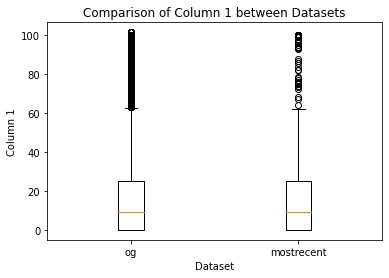

In [34]:
data = [fdsort['AcceleratorPedal'], most_recent['AcceleratorPedal']]
labels = ['og', 'mostrecent']


fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(labels)

# Set plot title and axis labels
ax.set_title('Comparison of Column 1 between Datasets')
ax.set_xlabel('Dataset')
ax.set_ylabel('Column 1')

# Show the plot
plt.show()


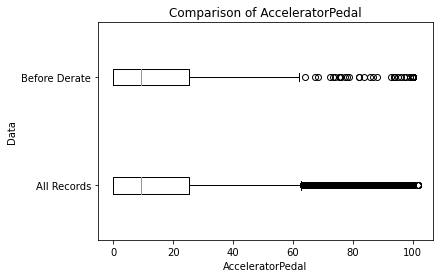

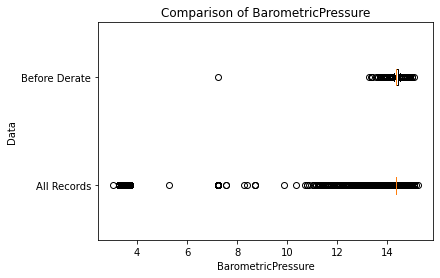

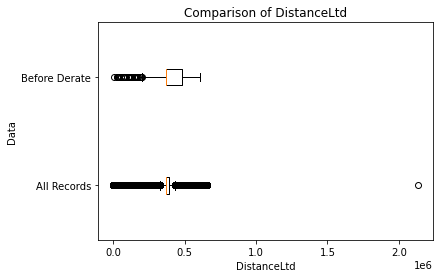

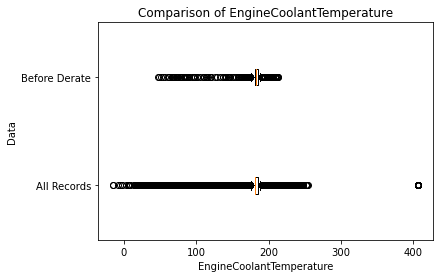

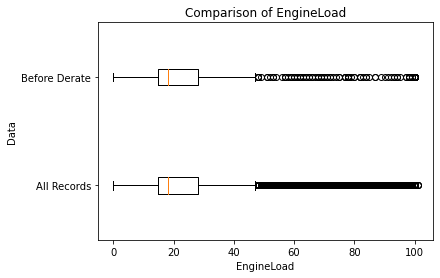

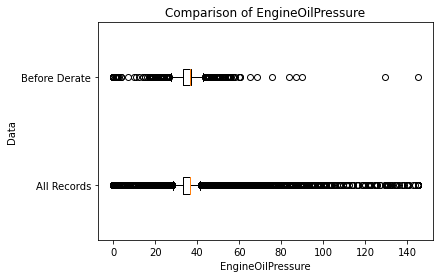

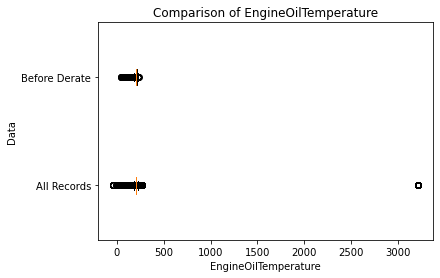

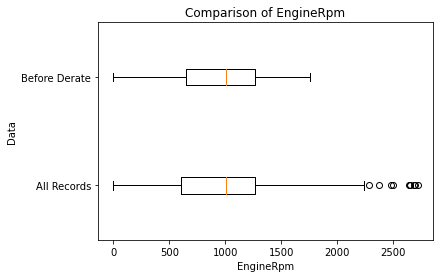

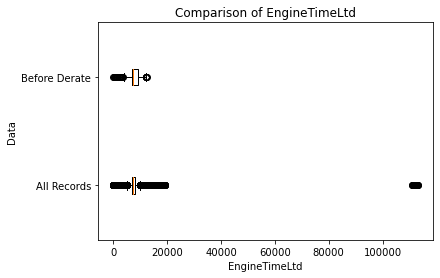

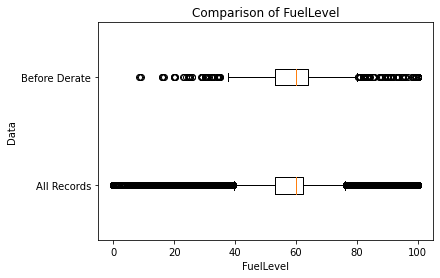

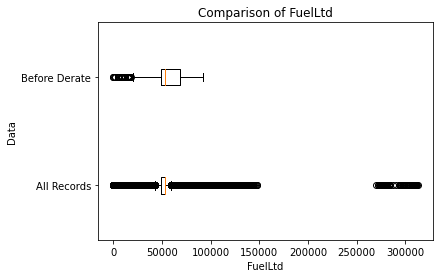

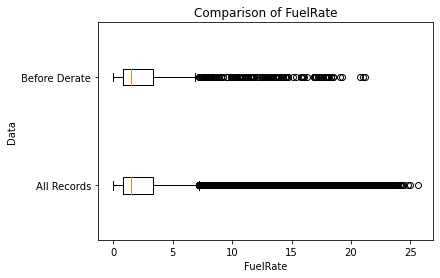

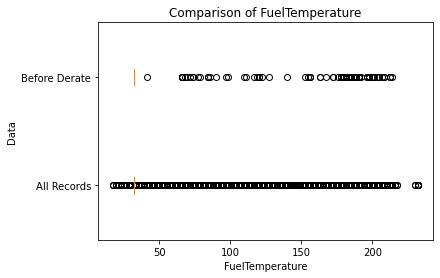

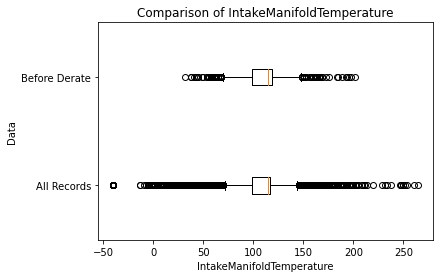

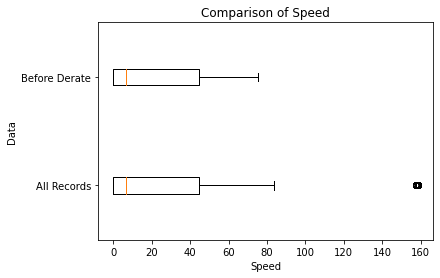

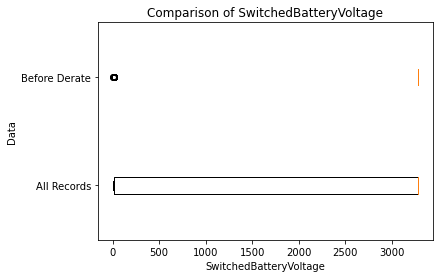

In [35]:
datasets = [fdsort, most_recent]
labels = ['All Records', 'Before Derate']


columnstocompare = ['AcceleratorPedal', 'BarometricPressure', 'DistanceLtd',
       'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure',
       'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel',
       'FuelLtd', 'FuelRate', 'FuelTemperature', 'IntakeManifoldTemperature', 'Speed',
       'SwitchedBatteryVoltage']





for column in columnstocompare:
    data = []
    for df in datasets:
        data.append(df[column])
    fig, ax = plt.subplots()
    ax.boxplot(data, vert = False)
    #ax.axvline(x= df[column].quantile(q=0.5), color='r', linestyle='--')
   # ax.axhline(y=0.5, color = 'r', linestyle= '--', label = 'b')

    ax.set_yticklabels(labels)
    ax.set_title(f"Comparison of {column}")
    ax.set_ylabel('Data')
    ax.set_xlabel(column)
    plt.show()

In [36]:
from scipy.stats import norm

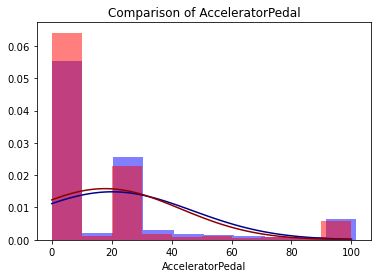

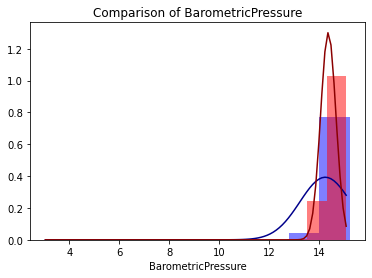

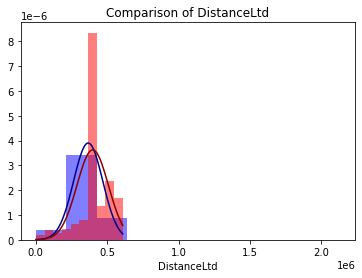

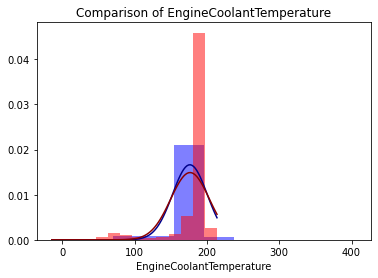

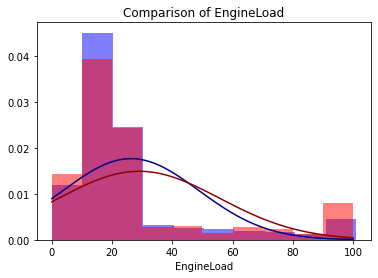

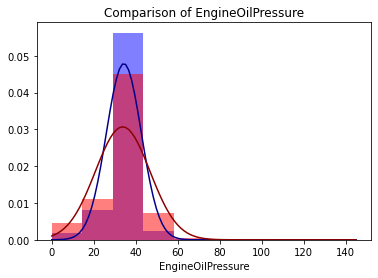

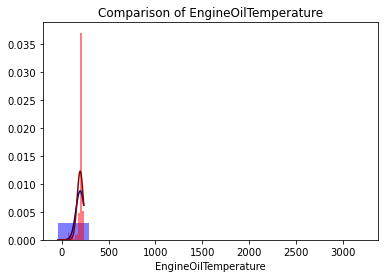

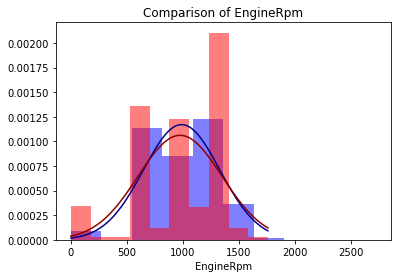

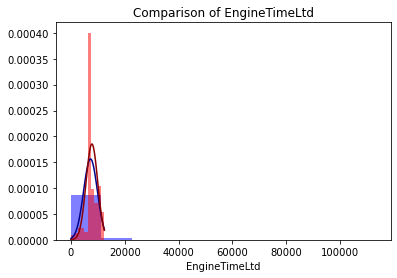

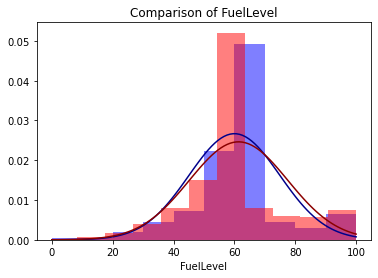

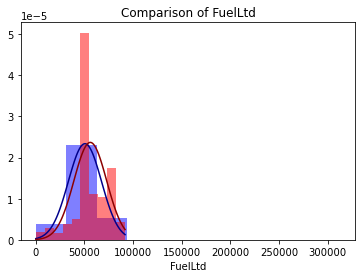

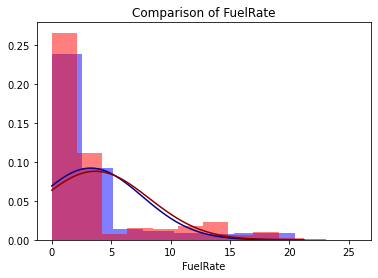

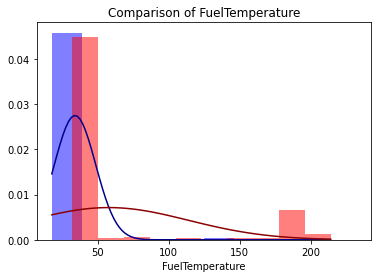

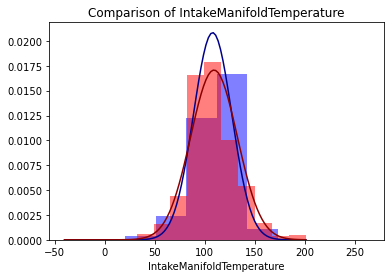

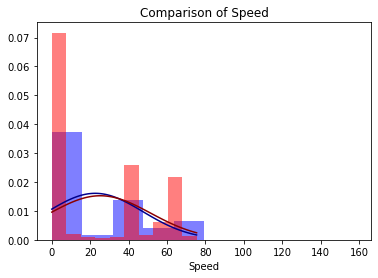

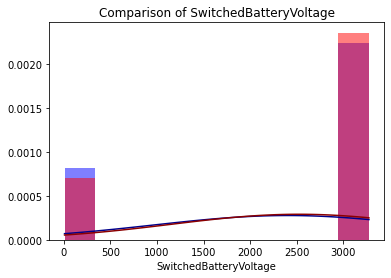

In [37]:
for column in columnstocompare:
    data = []
    for df in datasets:
        data.append(df[column])
    fig, ax = plt.subplots()
    ax.hist(fdsort[column], color = 'blue', density= True, alpha = 0.5)
    ax.hist(most_recent[column], color = 'red', density= True, alpha = 0.5)
    #ax.axvline(x= df[column].quantile(q=0.5), color='r', linestyle='--')
   # ax.axhline(y=0.5, color = 'r', linestyle= '--', label = 'b')
    mean1, std1 = fdsort[column].mean(), fdsort[column].std()
    mean2, std2 = most_recent[column].mean(), most_recent[column].std()
    
    x = np.linspace(fdsort[column].min(),  most_recent[column].max(), 100)
    
    pdf1 = norm.pdf(x, mean1, std1)
    pdf2 = norm.pdf(x, mean2, std2)
    
    
    ax.plot(x, pdf1, color='darkblue', label='PDF Dataset 1')

    # Plot the PDF curve for the second dataset with a yellow color
    ax.plot(x, pdf2, color='darkred', label='PDF Dataset 2')

    
    #ax.set_yticklabels(labels)
    ax.set_title(f"Comparison of {column}")
    #ax.set_ylabel('Data')
    ax.set_xlabel(column)
    plt.show()

In [62]:
pip install scikit-survival


Note: you may need to restart the kernel to use updated packages.


Text(0.5, 0, 'distance $mi$')

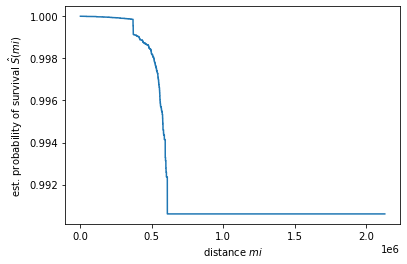

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(fdsort["full_drt"], fdsort["DistanceLtd"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(mi)$")
plt.xlabel("distance $mi$")

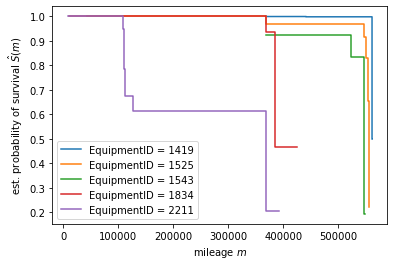

In [67]:
for treatment_type in fdsort['EquipmentID'].unique():
    mask_treat = fdsort["EquipmentID"] == treatment_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        fdsort["full_drt"][mask_treat],
        fdsort["DistanceLtd"][mask_treat])
    
    if survival_prob_treatment[-1] < 0.5:
        plt.step(time_treatment, survival_prob_treatment, where="post",
             label="EquipmentID = %s" % treatment_type)

plt.ylabel("est. probability of survival $\hat{S}(m)$")
plt.xlabel("mileage $m$")
plt.legend(loc="best")

In [73]:
ftemp = list(range(int(fdsort['FuelTemperature'].min()), int(fdsort['FuelTemperature'].max()), 10))

In [74]:
fdsort['tempgroup'] = pd.cut(fdsort['FuelTemperature'], ftemp)
grouped = fdsort.groupby('tempgroup')

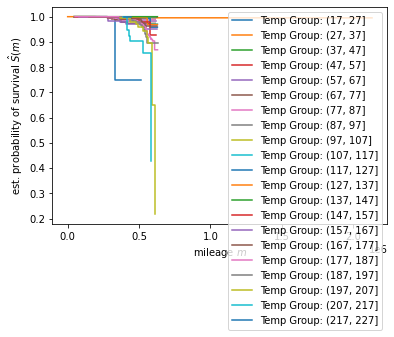

In [75]:
for temp_group, group_data in grouped:
    time, survival_prob = kaplan_meier_estimator(
        group_data["full_drt"],
        group_data["DistanceLtd"])
    
    # Get the label for the age group
    label = "Temp Group: {}".format(temp_group)

    # Plot the survival function for the age group
    plt.step(time, survival_prob, where="post", label=label)

    # Add plot labels and legend
plt.ylabel("est. probability of survival $\hat{S}(m)$")
plt.xlabel("mileage $m$")
plt.legend(loc="best")

In [ ]:
for treatment_type in fdsort['EquipmentID'].unique():
    mask_treat = fdsort["EquipmentID"] == treatment_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        fdsort["full_drt"][mask_treat],
        fdsort["DistanceLtd"][mask_treat])
    
    if survival_prob_treatment[-1] < 0.5:
        plt.step(time_treatment, survival_prob_treatment, where="post",
             label="EquipmentID = %s" % treatment_type)

plt.ylabel("est. probability of survival $\hat{S}(m)$")
plt.xlabel("mileage $m$")
plt.legend(loc="best")

In [43]:
fdsort['DistanceLtd'].max()

2131635.0

In [40]:
fdsort[(fdsort['DistanceLtd']<100000) & (fdsort['full_drt']==True)]['EquipmentID'].nunique()

8

In [41]:
fdsort['EquipmentID'].nunique()

1040

In [42]:
8/1040

0.007692307692307693

In [54]:
distanceslist = list(range(0, 2500001, 50000))
distanceslist

[0,
 50000,
 100000,
 150000,
 200000,
 250000,
 300000,
 350000,
 400000,
 450000,
 500000,
 550000,
 600000,
 650000,
 700000,
 750000,
 800000,
 850000,
 900000,
 950000,
 1000000,
 1050000,
 1100000,
 1150000,
 1200000,
 1250000,
 1300000,
 1350000,
 1400000,
 1450000,
 1500000,
 1550000,
 1600000,
 1650000,
 1700000,
 1750000,
 1800000,
 1850000,
 1900000,
 1950000,
 2000000,
 2050000,
 2100000,
 2150000,
 2200000,
 2250000,
 2300000,
 2350000,
 2400000,
 2450000,
 2500000]

In [55]:
equipments = []
for i in distanceslist:
    eq_ct = fdsort[(fdsort['DistanceLtd']<i) & (fdsort['full_drt']==True)]['EquipmentID'].nunique()
    equipments.append(eq_ct)

In [56]:
equipments

[0,
 4,
 8,
 14,
 22,
 33,
 42,
 64,
 187,
 187,
 188,
 190,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191]

In [60]:
equip_df = pd.DataFrame({'Distance': distanceslist, 'Count': equipments})
equip_df['Total'] = 1040
equip_df['probability_der'] = 100*equip_df['Count']/equip_df['Total']
equip_df['probability_surv'] = 100 - equip_df['probability_der']
equip_df = equip_df[equip_df['Distance']<700000]
equip_df

,Distance,Count,Total,probability_der,probability_surv
0,0,0,1040,0.000000,100.000000
1,50000,4,1040,0.384615,99.615385
2,100000,8,1040,0.769231,99.230769
3,150000,14,1040,1.346154,98.653846
4,200000,22,1040,2.115385,97.884615
5,250000,33,1040,3.173077,96.826923
6,300000,42,1040,4.038462,95.961538
7,350000,64,1040,6.153846,93.846154
8,400000,187,1040,17.980769,82.019231
9,450000,187,1040,17.980769,82.019231


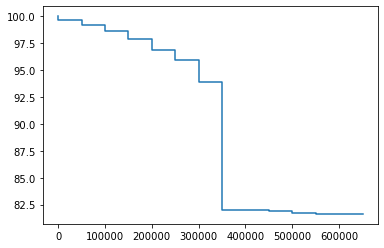

In [76]:
import matplotlib.pyplot as plt
plt.step(equip_df['Distance'], equip_df['probability_der'])
plt.show()

? it is important to note that the Kaplan-Meier estimator assumes that censoring is non-informative, meaning that the probability of censoring does not depend on the survival time of the equipment. If this assumption is violated, the results of the analysis may be biased. Therefore, it is important to carefully consider the potential sources of bias in the data when interpreting the results of survival analysis.

In [44]:
fdsort.columns

Index(['FaultId', 'AcceleratorPedal', 'BarometricPressure',
       'CruiseControlActive', 'CruiseControlSetSpeed', 'DistanceLtd',
       'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure',
       'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel',
       'FuelLtd', 'FuelRate', 'FuelTemperature', 'IgnStatus',
       'IntakeManifoldTemperature', 'LampStatus', 'ParkingBrake', 'Speed',
       'SwitchedBatteryVoltage', 'Throttle', 'TurboBoostPressure', 'RecordID',
       'ESS_Id', 'EventTimeStamp', 'eventDescription', 'ecuModel', 'ecuMake',
       'ecuSource', 'spn', 'fmi', 'active', 'activeTransitionCount',
       'EquipmentID', 'MCTNumber', 'Latitude', 'Longitude', 'spnfmi',
       'earliest', 'mindist', 'days_ct', 'dis_trav', 'full_drt',
       'cumulative_faults'],
      dtype='object')

In [45]:
data_x = fdsort.drop(columns = ['FaultId', 'CruiseControlSetSpeed', 'SwitchedBatteryVoltage', 'RecordID', 'ESS_Id',
                    'activeTransitionCount', 'eventDescription', 'ecuModel','ecuSource',  'active', 
                     'activeTransitionCount','MCTNumber', 'Latitude', 'Longitude', 'full_drt', 'EventTimeStamp', 'earliest', 
                               "dis_trav", "mindist", "cumulative_faults", "EquipmentID", "days_ct"] )

In [46]:
data_x

,AcceleratorPedal,BarometricPressure,CruiseControlActive,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,...,IntakeManifoldTemperature,LampStatus,ParkingBrake,Speed,Throttle,TurboBoostPressure,ecuMake,spn,fmi,spnfmi
43654,14.4,13.9200,False,120841.700000,185.0,18.0,55.10,193.6062,1145.750,2372.75,...,154.4,1279,False,4.475814,14.4,0.58,unknown,639,2,639-2
45401,89.6,14.4275,False,121687.100000,186.8,38.0,52.78,217.1750,1257.500,2388.15,...,120.2,4351,False,64.637170,89.6,4.64,unknown,596,31,596-31
49950,0.0,14.3550,False,123057.100000,185.0,0.0,55.68,213.9688,1230.250,2413.65,...,118.4,17407,False,63.525490,0.0,20.30,PACCAR,3226,10,3226-10
53988,12.0,14.5725,False,124496.500000,183.2,14.0,51.62,196.7000,1115.500,2443.50,...,107.6,1279,False,4.364162,12.0,1.45,unknown,639,2,639-2
54080,9.2,14.3550,unknown,368419.300000,181.4,18.0,36.54,201.0875,1008.000,6960.80,...,114.8,1279,unknown,6.543815,0.0,1.74,unknown,639,2,639-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054111,1.6,14.4275,False,28606.656250,181.4,0.0,27.26,221.7312,863.250,586.75,...,100.4,1023,False,11.844890,100.0,1.74,unknown,111,18,111-18
1054112,9.2,14.3550,unknown,368419.300000,181.4,18.0,36.54,201.0875,1008.000,6960.80,...,114.8,1023,unknown,6.543815,0.0,1.74,unknown,111,18,111-18
1053453,0.0,14.2825,False,511.711578,167.0,12.0,30.74,165.6500,599.625,22.75,...,118.4,1023,True,0.000000,100.0,0.29,Cummins,1761,17,1761-17
1054077,0.0,14.2825,False,1058.216797,156.2,16.0,27.26,178.0250,605.125,23.55,...,114.8,50175,True,0.000000,100.0,0.58,Eaton,37,18,37-18


In [47]:
data_x.head().T

,43654,45401,49950,53988,54080
AcceleratorPedal,14.4,89.6,0.0,12.0,9.2
BarometricPressure,13.92,14.4275,14.355,14.5725,14.355
CruiseControlActive,False,False,False,False,unknown
DistanceLtd,120841.7,121687.1,123057.1,124496.5,368419.3
EngineCoolantTemperature,185.0,186.8,185.0,183.2,181.4
EngineLoad,18.0,38.0,0.0,14.0,18.0
EngineOilPressure,55.1,52.78,55.68,51.62,36.54
EngineOilTemperature,193.6062,217.175,213.9688,196.7,201.0875
EngineRpm,1145.75,1257.5,1230.25,1115.5,1008.0
EngineTimeLtd,2372.75,2388.15,2413.65,2443.5,6960.8


In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

onehot_cols = ['ecuMake', 'spnfmi', 'CruiseControlActive']

onehot_transformer = Pipeline(steps = [
    ('onehot', OneHotEncoder(sparse = False))
])



numeric_cols = ['AcceleratorPedal', 'BarometricPressure',
       'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure',
       'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel',
       'FuelLtd', 'FuelRate', 'FuelTemperature', 
       'IntakeManifoldTemperature', 'Speed',
        'TurboBoostPressure' ]


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])





preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_transformer, onehot_cols),
        ('scaler', numeric_transformer, numeric_cols)
    ])
#apply pca

# apply the transformation to the data
X_transformed = preprocessor.fit_transform(data_x)

/Users/essemcdaniel/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [49]:
X_transformed

array([[ 0.        ,  0.        ,  0.        , ...,  2.42216059,
        -0.73084821, -0.58033245],
       [ 0.        ,  0.        ,  0.        , ...,  0.63580318,
         1.69487396,  0.05562624],
       [ 0.        ,  0.        ,  1.        , ...,  0.54178437,
         1.65005072,  2.50860978],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.54178437,
        -0.91131424, -0.62575807],
       [ 0.        ,  1.        ,  0.        , ...,  0.35374674,
        -0.91131424, -0.58033245],
       [ 0.        ,  1.        ,  0.        , ...,  0.63580318,
        -0.91131424, -0.62575807]])

In [50]:
pd.DataFrame(X_transformed)

,0,1,2,3,4,5,6,7,8,9,...,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.046221,0.463556,-1.919719,1.096842,-1.957600,-0.118898,6.929609,2.422161,-0.730848,-0.580332
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.469740,0.791437,-1.913685,0.829265,-1.950420,0.704181,4.575065,0.635803,1.694874,0.055626
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.399550,0.711484,-1.903692,-0.615648,-1.939703,-0.756022,5.938222,0.541784,1.650051,2.508610
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.021507,0.374801,-1.891995,-1.257832,-1.927926,-0.222545,5.194682,-0.022329,-0.735350,-0.444056
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.117557,0.059389,-0.121854,0.160324,-0.099537,-0.411548,-0.134022,0.353747,-0.647466,-0.398630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054108,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.569482,-0.365315,-2.619578,-2.435168,-2.720812,-0.756022,-0.134022,-0.398404,-0.433725,-0.398630
1054109,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.117557,0.059389,-0.121854,0.160324,-0.099537,-0.411548,-0.134022,0.353747,-0.647466,-0.398630
1054110,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.658229,-1.138806,-2.840587,-1.873258,-2.953788,-0.615794,-0.134022,0.541784,-0.911314,-0.625758
1054111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.387320,-1.122669,-2.840273,-0.000222,-2.949919,-0.600552,-0.134022,0.353747,-0.911314,-0.580332


In [51]:
data_y = np.zeros(fdsort.shape[0], dtype=[('event', 'bool'), ('time', 'float')])

data_y['event'] = fdsort['full_drt'].astype(bool)
data_y['time'] = fdsort['dis_trav'].astype(float)

In [52]:
data_y

array([(False,     0.        ), (False,   845.4       ),
       (False,  2215.4       ), ..., (False,     0.        ),
       (False,     0.        ), (False, 78008.82320312)],
      dtype=[('event', '?'), ('time', '<f8')])

In [53]:
#kaplan meier 

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, data_y, test_size=0.3)

In [56]:
from sklearn import set_config
from sksurv.linear_model import CoxPHSurvivalAnalysis

set_config(display="text")  # displays text representation of estimators

estimator = CoxPHSurvivalAnalysis()
estimator.fit(X_train.toarray(), y_train)  

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

# trying lifelines package 

In [ ]:
#pip install lifelines

In [57]:
fdsort['full_derate_num'] = fdsort['full_drt'].apply(lambda x: 1 if x==True else 0)

In [58]:
fdsort['full_derate_num'].value_counts()

0    1053180
1        933
Name: full_derate_num, dtype: int64

In [59]:
fdsort_c = fdsort[fdsort['active'] == True]

In [60]:
fdsort_c = fdsort_c.drop_duplicates(subset = ['EventTimeStamp', 'EquipmentID'])

In [61]:
fdsort_c.head().T

,43654,45401,49950,53988,60495
FaultId,49415,51363,57330,61706,68953
AcceleratorPedal,14.4,89.6,0.0,12.0,67.2
BarometricPressure,13.92,14.4275,14.355,14.5725,13.92
CruiseControlActive,False,False,False,False,False
CruiseControlSetSpeed,0.0,0.0,0.0,0.0,0.0
DistanceLtd,120841.7,121687.1,123057.1,124496.5,125989.2
EngineCoolantTemperature,185.0,186.8,185.0,183.2,183.2
EngineLoad,18.0,38.0,0.0,14.0,68.0
EngineOilPressure,55.1,52.78,55.68,51.62,51.62
EngineOilTemperature,193.6062,217.175,213.9688,196.7,215.2063


In [62]:
fdsort_c = fdsort_c.drop(columns =[ 'CruiseControlActive',  'FaultId', 'CruiseControlSetSpeed', 'SwitchedBatteryVoltage', 'RecordID', 'ESS_Id',
                    'activeTransitionCount', 'eventDescription', 'ecuModel','ecuSource',  'active', 
                     'activeTransitionCount','MCTNumber', 'Latitude', 'Longitude', 'full_drt', 'EventTimeStamp', 'earliest', 
                               "dis_trav", "mindist", "cumulative_faults", "EquipmentID"] )                         

# COLUMN TRANSFORMER

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


onehot_cols = ['ecuMake', 'spnfmi']


numeric_cols = ['AcceleratorPedal', 'BarometricPressure',
       'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure',
       'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel',
       'FuelLtd', 'FuelRate', 'FuelTemperature', 
       'IntakeManifoldTemperature', 'Speed',
        'TurboBoostPressure' ]


pt_cols = ['DistanceLtd', 'full_derate_num', 'days_ct']
 


preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse = False), onehot_cols),
        ('scaler', StandardScaler(), numeric_cols),
        ('passthru', 'passthrough', pt_cols)
    ],
    remainder = 'drop')



# FIT PREPROCESSOR ON DATAFRAME
fdsort_transformed = preprocessor.fit_transform(fdsort_c)




#GET FEATURE NAMES

feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_cols)

transformed_cols = list(feature_names) + numeric_cols  + pt_cols




#MAKE DATAFRAME
fdsort_transformed_df = pd.DataFrame(fdsort_transformed, columns=transformed_cols)


/Users/essemcdaniel/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
fdsort_transformed.shape

(495894, 955)

In [65]:
len(transformed_cols)

955

In [66]:
len(feature_names)

937

In [67]:
len(numeric_cols)

15

In [70]:
fdsort_transformed_df

,ecuMake_Cummins,ecuMake_Eaton,ecuMake_PACCAR,ecuMake_Volvo,ecuMake_unknown,spnfmi_0-0,spnfmi_100-1,spnfmi_100-18,spnfmi_100-2,spnfmi_100-3,...,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IntakeManifoldTemperature,Speed,TurboBoostPressure,DistanceLtd,full_derate_num,days_ct
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.729320,-1.439737,-0.313994,5.358992,1.897589,-0.769392,-0.662796,120841.700000,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.532553,-1.434520,0.309216,3.515454,0.542410,1.383390,-0.182232,121687.100000,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.529986,-1.426734,-0.796405,4.582766,0.471085,1.343610,1.671373,123057.100000,0.0,6.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.002226,-1.418178,-0.392472,4.000596,0.043133,-0.773387,-0.559818,124496.500000,0.0,10.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.040637,-1.409706,1.207099,4.776822,0.899036,1.390512,1.637047,125989.200000,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.850889,-2.012887,-0.595593,-0.171621,-1.882647,-0.929552,-0.697122,25442.164062,0.0,44.0
495890,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.630936,-2.006022,-0.554045,-0.171621,-1.383370,-0.872923,-0.731448,26701.251953,0.0,48.0
495891,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.867999,-1.994234,-0.796405,-0.171621,-0.242167,-0.505701,-0.525492,28606.656250,0.0,52.0
495892,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.454789,-2.163498,-0.690228,-0.171621,0.471085,-0.929552,-0.697122,511.711578,0.0,0.0


In [71]:
fdsort_transformed_df = fdsort_transformed_df.drop(columns = ['spnfmi_5246-0', 'spnfmi_5246-16'])

In [72]:
fdsort_transformed_df['full_derate_num']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
495889    0.0
495890    0.0
495891    0.0
495892    0.0
495893    0.0
Name: full_derate_num, Length: 495894, dtype: float64

In [ ]:
df_conv_err = fdsort_transformed_df.drop(columns = ['spnfmi_100-1', 'spnfmi_100-3', 'spnfmi_100-4', 'spnfmi_101-15', 'spnfmi_101-3', 'spnfmi_102-14', 'spnfmi_102-15', 'spnfmi_102-17', 'spnfmi_102-20', 'spnfmi_102-3', 'spnfmi_102-31', 'spnfmi_102-4', 'spnfmi_102-5', 'spnfmi_1023-5', 'spnfmi_103-1', 'spnfmi_103-10', 'spnfmi_103-16', 'spnfmi_103-7', 'spnfmi_103-9', 'spnfmi_105-0', 'spnfmi_105-17', 'spnfmi_105-18', 'spnfmi_105-3', 'spnfmi_105-5', 'spnfmi_1056-4', 'spnfmi_1056-5', 'spnfmi_1067-11', 'spnfmi_107-3', 'spnfmi_107-4', 'spnfmi_1071-5', 'spnfmi_1072-1', 'spnfmi_1072-3', 'spnfmi_1072-5', 'spnfmi_1073-3', 'spnfmi_1075-3', 'spnfmi_1078-4', 'spnfmi_108-3', 'spnfmi_108-4', 'spnfmi_1081-9', 'spnfmi_110-16', 'spnfmi_110-2', 'spnfmi_110-3', 'spnfmi_111-5', 'spnfmi_1127-14', 'spnfmi_1127-16', 'spnfmi_114863-11', 'spnfmi_116-31', 'spnfmi_116-4', 'spnfmi_1172-2', 'spnfmi_1176-1', 'spnfmi_1176-18', 'spnfmi_1209-18', 'spnfmi_1209-3', 'spnfmi_1231-1', 'spnfmi_1231-14', 'spnfmi_1231-2', 'spnfmi_1235-2', 'spnfmi_1235-9', 'spnfmi_1236-9', 'spnfmi_1239-16', 'spnfmi_1247-14', 'spnfmi_125-0', 'spnfmi_127-1', 'spnfmi_127-18', 'spnfmi_1279-2', 'spnfmi_1321-14', 'spnfmi_1321-22', 'spnfmi_1321-3', 'spnfmi_1321-5', 'spnfmi_1322-11', 'spnfmi_1322-31', 'spnfmi_1323-31', 'spnfmi_1324-1', 'spnfmi_1324-31', 'spnfmi_1325-1', 'spnfmi_1325-31', 'spnfmi_1326-1', 'spnfmi_1326-11', 'spnfmi_1326-31', 'spnfmi_1327-31', 'spnfmi_1328-11', 'spnfmi_1328-31', 'spnfmi_1347-16', 'spnfmi_1347-3', 'spnfmi_1347-4', 'spnfmi_1347-5', 'spnfmi_1349-3', 'spnfmi_13600-20', 'spnfmi_139296-2', 'spnfmi_1464-2', 'spnfmi_1482-9', 'spnfmi_1487-3', 'spnfmi_1487-7', 'spnfmi_153-2', 'spnfmi_153-7', 'spnfmi_153931-4', 'spnfmi_157-16', 'spnfmi_157-3', 'spnfmi_158-18', 'spnfmi_158-2', 'spnfmi_16-3', 'spnfmi_16-4', 'spnfmi_160-5', 'spnfmi_1659-12', 'spnfmi_1659-7', 'spnfmi_1668-9', 'spnfmi_167-18', 'spnfmi_1675-0', 'spnfmi_168-0', 'spnfmi_168-14', 'spnfmi_168-16', 'spnfmi_168-18', 'spnfmi_168-3', 'spnfmi_171-12', 'spnfmi_171-9', 'spnfmi_173-0', 'spnfmi_173-5', 'spnfmi_174-3', 'spnfmi_175-0', 'spnfmi_175-18', 'spnfmi_175-3', 'spnfmi_175-5', 'spnfmi_17590-0', 'spnfmi_1761-1', 'spnfmi_1761-10', 'spnfmi_1761-12', 'spnfmi_1761-14', 'spnfmi_1761-4', 'spnfmi_177-3', 'spnfmi_1807-12', 'spnfmi_1808-14', 'spnfmi_1809-13', 'spnfmi_1809-2', 'spnfmi_184-10', 'spnfmi_188-16', 'spnfmi_188-18', 'spnfmi_190-0', 'spnfmi_190-11', 'spnfmi_190-16', 'spnfmi_190-2', 'spnfmi_190-9', 'spnfmi_191-14', 'spnfmi_191-19', 'spnfmi_191-5', 'spnfmi_191-9', 'spnfmi_196608-29', 'spnfmi_2000-9', 'spnfmi_2017-19', 'spnfmi_2017-9', 'spnfmi_2023-19', 'spnfmi_2023-9', 'spnfmi_2029-9', 'spnfmi_228-9', 'spnfmi_235-9', 'spnfmi_236-9', 'spnfmi_237-13', 'spnfmi_237-31', 'spnfmi_245-9', 'spnfmi_247-9', 'spnfmi_251-10', 'spnfmi_251-9', 'spnfmi_252-9', 'spnfmi_255-2', 'spnfmi_2579-3', 'spnfmi_2579-4', 'spnfmi_2623-3', 'spnfmi_2623-8', 'spnfmi_2629-0', 'spnfmi_2629-2', 'spnfmi_2629-5', 'spnfmi_2630-3', 'spnfmi_2659-18', 'spnfmi_2659-2', 'spnfmi_2791-0', 'spnfmi_2791-11', 'spnfmi_2791-15', 'spnfmi_2791-5', 'spnfmi_2791-6', 'spnfmi_2791-9', 'spnfmi_2795-1', 'spnfmi_2795-16', 'spnfmi_2795-18', 'spnfmi_2795-7', 'spnfmi_2866-12', 'spnfmi_2912-19', 'spnfmi_2917-13', 'spnfmi_29902-0', 'spnfmi_3031-0', 'spnfmi_3031-2', 'spnfmi_3031-4', 'spnfmi_3058-10', 'spnfmi_3058-18', 'spnfmi_3064-0', 'spnfmi_3064-11', 'spnfmi_3064-16', 'spnfmi_32000-0', 'spnfmi_3216-11', 'spnfmi_3216-13', 'spnfmi_3216-14', 'spnfmi_3216-16', 'spnfmi_3216-2', 'spnfmi_3216-21', 'spnfmi_3216-3', 'spnfmi_3216-31', 'spnfmi_3217-12', 'spnfmi_3217-16', 'spnfmi_3217-2', 'spnfmi_3218-2', 'spnfmi_3222-5', 'spnfmi_3226-11', 'spnfmi_3226-12', 'spnfmi_3226-14', 'spnfmi_3226-2', 'spnfmi_3226-21', 'spnfmi_3226-3', 'spnfmi_3226-5', 'spnfmi_3227-10', 'spnfmi_3227-21', 'spnfmi_3228-2', 'spnfmi_3241-19', 'spnfmi_3241-5', 'spnfmi_3242-0', 'spnfmi_3242-15', 'spnfmi_3242-16', 'spnfmi_3242-4', 'spnfmi_3245-19', 'spnfmi_3245-2', 'spnfmi_3245-4', 'spnfmi_3245-5', 'spnfmi_3246-0', 'spnfmi_3246-15', 'spnfmi_3246-16', 'spnfmi_3246-2', 'spnfmi_3246-4', 'spnfmi_3249-19', 'spnfmi_3249-5', 'spnfmi_3251-10', 'spnfmi_3251-15', 'spnfmi_3251-3', 'spnfmi_3251-5', 'spnfmi_3253-0', 'spnfmi_32894-0', 'spnfmi_33-1', 'spnfmi_33-14', 'spnfmi_335040-23', 'spnfmi_3360-11', 'spnfmi_3360-12', 'spnfmi_3360-13', 'spnfmi_3360-19', 'spnfmi_3360-2', 'spnfmi_3360-9', 'spnfmi_3361-12', 'spnfmi_3361-2', 'spnfmi_3361-3', 'spnfmi_3361-5', 'spnfmi_3362-7', 'spnfmi_3363-4', 'spnfmi_3363-7', 'spnfmi_3364-10', 'spnfmi_3364-18', 'spnfmi_3480-17', 'spnfmi_3480-2', 'spnfmi_3480-3', 'spnfmi_3480-4', 'spnfmi_3482-3', 'spnfmi_3482-7', 'spnfmi_3490-12', 'spnfmi_3490-4', 'spnfmi_3490-5', 'spnfmi_3510-4', 'spnfmi_3511-4', 'spnfmi_3512-4', 'spnfmi_3513-3', 'spnfmi_3513-4', 'spnfmi_3514-4', 'spnfmi_3515-10', 'spnfmi_3521-18', 'spnfmi_35527-0', 'spnfmi_3556-12', 'spnfmi_3556-2', 'spnfmi_3583-4', 'spnfmi_3584-0', 'spnfmi_3597-3', 'spnfmi_3597-4', 'spnfmi_3605-2', 'spnfmi_3610-3', 'spnfmi_3663-5', 'spnfmi_3695-2', 'spnfmi_3696-9', 'spnfmi_3697-9', 'spnfmi_3698-9', 'spnfmi_37-17', 'spnfmi_37-5', 'spnfmi_3703-31', 'spnfmi_3703-9', 'spnfmi_37265-0', 'spnfmi_38-3', 'spnfmi_38-9', 'spnfmi_39093-0', 'spnfmi_3936-0', 'spnfmi_3936-14', 'spnfmi_3936-16', 'spnfmi_3936-18', 'spnfmi_3936-7', 'spnfmi_4094-1', 'spnfmi_4095-7', 'spnfmi_4096-31', 'spnfmi_411-3', 'spnfmi_411-4', 'spnfmi_411-5', 'spnfmi_412-16', 'spnfmi_412-3', 'spnfmi_4219-0', 'spnfmi_4219-11', 'spnfmi_4219-6', 'spnfmi_4219-8', 'spnfmi_42190-0', 'spnfmi_4220-0', 'spnfmi_43088-0', 'spnfmi_4331-16', 'spnfmi_4331-18', 'spnfmi_4334-16', 'spnfmi_4334-2', 'spnfmi_4334-3', 'spnfmi_4334-4', 'spnfmi_4334-5', 'spnfmi_4339-0', 'spnfmi_4340-3', 'spnfmi_4340-4', 'spnfmi_4342-3', 'spnfmi_4342-4', 'spnfmi_4342-5', 'spnfmi_4344-3', 'spnfmi_4344-4', 'spnfmi_4344-5', 'spnfmi_4346-19', 'spnfmi_4346-5', 'spnfmi_4349-7', 'spnfmi_4354-3', 'spnfmi_4354-4', 'spnfmi_4354-5', 'spnfmi_4356-5', 'spnfmi_4360-0', 'spnfmi_4360-10', 'spnfmi_4360-16', 'spnfmi_4360-19', 'spnfmi_4360-3', 'spnfmi_4360-4', 'spnfmi_4363-10', 'spnfmi_4363-16', 'spnfmi_4363-19', 'spnfmi_4363-2', 'spnfmi_4363-4', 'spnfmi_4364-31', 'spnfmi_4375-0', 'spnfmi_4375-12', 'spnfmi_4375-14', 'spnfmi_4375-2', 'spnfmi_4375-5', 'spnfmi_4376-3', 'spnfmi_4376-4', 'spnfmi_4376-5', 'spnfmi_4376-7', 'spnfmi_4380-4', 'spnfmi_4382-11', 'spnfmi_441-3', 'spnfmi_442-3', 'spnfmi_444-1', 'spnfmi_444-16', 'spnfmi_444-18', 'spnfmi_4607-18', 'spnfmi_4607-5', 'spnfmi_46262-0', 'spnfmi_47284-0', 'spnfmi_4752-18', 'spnfmi_4765-16', 'spnfmi_4765-19', 'spnfmi_4765-2', 'spnfmi_4765-4', 'spnfmi_4766-15', 'spnfmi_4766-3', 'spnfmi_4792-14', 'spnfmi_4796-31', 'spnfmi_4811-2', 'spnfmi_4811-5', 'spnfmi_4812-4', 'spnfmi_4812-5', 'spnfmi_4813-3', 'spnfmi_4813-4', 'spnfmi_4813-5', 'spnfmi_5018-1', 'spnfmi_5019-2', 'spnfmi_5019-3', 'spnfmi_5019-4', 'spnfmi_5031-10', 'spnfmi_5052-2', 'spnfmi_5052-3', 'spnfmi_51-2', 'spnfmi_51-3', 'spnfmi_5109-12', 'spnfmi_5110-12', 'spnfmi_5111-12', 'spnfmi_5112-12', 'spnfmi_5112-9', 'spnfmi_5113-12', 'spnfmi_5113-9', 'spnfmi_5114-12', 'spnfmi_5114-9', 'spnfmi_5115-12', 'spnfmi_5116-12', 'spnfmi_5117-12', 'spnfmi_5117-9', 'spnfmi_512-0', 'spnfmi_520200-9', 'spnfmi_520201-3', 'spnfmi_520271-3', 'spnfmi_520271-4', 'spnfmi_520274-4', 'spnfmi_520298-9', 'spnfmi_520302-3', 'spnfmi_520330-0', 'spnfmi_520413-9', 'spnfmi_521032-14', 'spnfmi_522-7', 'spnfmi_523530-31', 'spnfmi_523543-2', 'spnfmi_524033-31', 'spnfmi_524037-31', 'spnfmi_524071-31', 'spnfmi_5245-10', 'spnfmi_5246-14', 'spnfmi_5246-15', 'spnfmi_5246-19', 'spnfmi_525-12', 'spnfmi_5298-17', 'spnfmi_5321-31', 'spnfmi_5357-17', 'spnfmi_5392-31', 'spnfmi_5394-12', 'spnfmi_5394-14', 'spnfmi_5394-3', 'spnfmi_5394-4', 'spnfmi_5394-7', 'spnfmi_5395-1', 'spnfmi_53958-0', 'spnfmi_5442-16', 'spnfmi_5443-13', 'spnfmi_5443-8', 'spnfmi_54478-0', 'spnfmi_5485-11', 'spnfmi_5491-3', 'spnfmi_5491-4', 'spnfmi_5491-5', 'spnfmi_5491-7', 'spnfmi_5569-2', 'spnfmi_5571-0', 'spnfmi_5571-4', 'spnfmi_5571-6', 'spnfmi_5579-17', 'spnfmi_558-19', 'spnfmi_558-3', 'spnfmi_558-4', 'spnfmi_558-5', 'spnfmi_558-9', 'spnfmi_560-20', 'spnfmi_560-21', 'spnfmi_560-31', 'spnfmi_560-7', 'spnfmi_5614-0', 'spnfmi_5614-10', 'spnfmi_5614-16', 'spnfmi_5614-7', 'spnfmi_5615-0', 'spnfmi_5615-16', 'spnfmi_5616-10', 'spnfmi_5616-18', 'spnfmi_5616-7', 'spnfmi_5616-8', 'spnfmi_5625-13', 'spnfmi_5625-16', 'spnfmi_5625-18', 'spnfmi_563-14', 'spnfmi_56503-0', 'spnfmi_5742-10', 'spnfmi_5742-11', 'spnfmi_5742-12', 'spnfmi_5742-16', 'spnfmi_5742-3', 'spnfmi_5742-4', 'spnfmi_5743-11', 'spnfmi_5743-12', 'spnfmi_5743-3', 'spnfmi_5743-4', 'spnfmi_5745-18', 'spnfmi_5745-3', 'spnfmi_5745-4', 'spnfmi_576-14', 'spnfmi_577-19', 'spnfmi_578-3', 'spnfmi_583-13', 'spnfmi_5835-21', 'spnfmi_5835-4', 'spnfmi_5835-9', 'spnfmi_5848-12', 'spnfmi_5848-13', 'spnfmi_5848-19', 'spnfmi_5848-3', 'spnfmi_5851-18', 'spnfmi_5851-2', 'spnfmi_5853-10', 'spnfmi_5862-0', 'spnfmi_5862-16', 'spnfmi_5862-2', 'spnfmi_5862-3', 'spnfmi_5862-4', 'spnfmi_5902-15', 'spnfmi_5903-15', 'spnfmi_5909-17', 'spnfmi_5941-0', 'spnfmi_5942-0', 'spnfmi_5942-6', 'spnfmi_5953-21', 'spnfmi_596-0', 'spnfmi_603-19', 'spnfmi_609-12', 'spnfmi_609-4', 'spnfmi_609-9', 'spnfmi_614-14', 'spnfmi_6145-18', 'spnfmi_6145-7', 'spnfmi_6146-0', 'spnfmi_6146-16', 'spnfmi_6147-15', 'spnfmi_6147-17', 'spnfmi_6148-21', 'spnfmi_624-3', 'spnfmi_624-5', 'spnfmi_627-3', 'spnfmi_628-11', 'spnfmi_628-13', 'spnfmi_628-14', 'spnfmi_628-2', 'spnfmi_628-31', 'spnfmi_629-11', 'spnfmi_629-14', 'spnfmi_630-2', 'spnfmi_632-3', 'spnfmi_633-31', 'spnfmi_636-7', 'spnfmi_636-8', 'spnfmi_639-13', 'spnfmi_641-12', 'spnfmi_641-13', 'spnfmi_641-14', 'spnfmi_641-2', 'spnfmi_641-31', 'spnfmi_641-4', 'spnfmi_649-11', 'spnfmi_649-2', 'spnfmi_649-4', 'spnfmi_649-9', 'spnfmi_651-5', 'spnfmi_651-7', 'spnfmi_652-18', 'spnfmi_652-3', 'spnfmi_652-5', 'spnfmi_65287-0', 'spnfmi_653-16', 'spnfmi_653-3', 'spnfmi_653-5', 'spnfmi_65302-11', 'spnfmi_65303-11', 'spnfmi_654-18', 'spnfmi_654-3', 'spnfmi_654-5', 'spnfmi_655-5', 'spnfmi_65535-10', 'spnfmi_65535-11', 'spnfmi_65535-18', 'spnfmi_65535-2', 'spnfmi_65535-20', 'spnfmi_65535-3', 'spnfmi_65535-31', 'spnfmi_65535-4', 'spnfmi_65535-5', 'spnfmi_65535-9', 'spnfmi_656-3', 'spnfmi_656-5', 'spnfmi_6713-13', 'spnfmi_6713-9', 'spnfmi_677-3', 'spnfmi_6773-16', 'spnfmi_6780-3', 'spnfmi_70-21', 'spnfmi_705-4', 'spnfmi_709-31', 'spnfmi_723-2', 'spnfmi_729-3', 'spnfmi_7321-4', 'spnfmi_7323-4', 'spnfmi_74-14', 'spnfmi_75-3', 'spnfmi_751-9', 'spnfmi_752-13', 'spnfmi_752-5', 'spnfmi_76339-0', 'spnfmi_767-5', 'spnfmi_768-0', 'spnfmi_77-3', 'spnfmi_78-3', 'spnfmi_781-7', 'spnfmi_78132-17', 'spnfmi_7827-31', 'spnfmi_7847-31', 'spnfmi_7854-2', 'spnfmi_7854-3', 'spnfmi_7854-4', 'spnfmi_788-7', 'spnfmi_789-4', 'spnfmi_789-5', 'spnfmi_789-8', 'spnfmi_789-9', 'spnfmi_790-4', 'spnfmi_790-5', 'spnfmi_790-8', 'spnfmi_791-4', 'spnfmi_791-5', 'spnfmi_791-8', 'spnfmi_791-9', 'spnfmi_792-4', 'spnfmi_792-5', 'spnfmi_792-9', 'spnfmi_793-14', 'spnfmi_793-9', 'spnfmi_794-1', 'spnfmi_794-10', 'spnfmi_794-14', 'spnfmi_794-7', 'spnfmi_794-9', 'spnfmi_795-4', 'spnfmi_795-5', 'spnfmi_796-4', 'spnfmi_796-5', 'spnfmi_797-5', 'spnfmi_798-5', 'spnfmi_799-13', 'spnfmi_799-4', 'spnfmi_801-6', 'spnfmi_802-12', 'spnfmi_805-14', 'spnfmi_806-3', 'spnfmi_806-5', 'spnfmi_807-8', 'spnfmi_807-9', 'spnfmi_81-2', 'spnfmi_81-4', 'spnfmi_810-14', 'spnfmi_811-2', 'spnfmi_829-0', 'spnfmi_830-3', 'spnfmi_84-10', 'spnfmi_84-19', 'spnfmi_84-5', 'spnfmi_862-3', 'spnfmi_88121-16', 'spnfmi_904-19', 'spnfmi_906-19', 'spnfmi_908-19', 'spnfmi_91-0', 'spnfmi_91-19', 'spnfmi_917-9', 'spnfmi_92-9', 'spnfmi_9295-0', 'spnfmi_932-4', 'spnfmi_933-4', 'spnfmi_933-5', 'spnfmi_937-3', 'spnfmi_937-4', 'spnfmi_937-5', 'spnfmi_938-4', 'spnfmi_938-5', 'spnfmi_939-3', 'spnfmi_939-5', 'spnfmi_94-17', 'spnfmi_94-4', 'spnfmi_940-3', 'spnfmi_940-5', 'spnfmi_941-3', 'spnfmi_941-4', 'spnfmi_95-16', 'spnfmi_96-13', 'spnfmi_97-4', 'spnfmi_976-9', 'spnfmi_98-18', 'spnfmi_98-5'])

In [ ]:
df_conv_err.shape

# df_v1 using Distance

In [74]:
df_v1 = fdsort_transformed_df.drop(columns = ['days_ct'])
df_v1

,ecuMake_Cummins,ecuMake_Eaton,ecuMake_PACCAR,ecuMake_Volvo,ecuMake_unknown,spnfmi_0-0,spnfmi_100-1,spnfmi_100-18,spnfmi_100-2,spnfmi_100-3,...,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IntakeManifoldTemperature,Speed,TurboBoostPressure,DistanceLtd,full_derate_num
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.401766,0.729320,-1.439737,-0.313994,5.358992,1.897589,-0.769392,-0.662796,120841.700000,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.397370,0.532553,-1.434520,0.309216,3.515454,0.542410,1.383390,-0.182232,121687.100000,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.390091,-0.529986,-1.426734,-0.796405,4.582766,0.471085,1.343610,1.671373,123057.100000,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.381570,-1.002226,-1.418178,-0.392472,4.000596,0.043133,-0.773387,-0.559818,124496.500000,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.372322,0.040637,-1.409706,1.207099,4.776822,0.899036,1.390512,1.637047,125989.200000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.927577,1.850889,-2.012887,-0.595593,-0.171621,-1.882647,-0.929552,-0.697122,25442.164062,0.0
495890,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.921240,0.630936,-2.006022,-0.554045,-0.171621,-1.383370,-0.872923,-0.731448,26701.251953,0.0
495891,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.911577,-1.867999,-1.994234,-0.796405,-0.171621,-0.242167,-0.505701,-0.525492,28606.656250,0.0
495892,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.072570,-1.454789,-2.163498,-0.690228,-0.171621,0.471085,-0.929552,-0.697122,511.711578,0.0


In [102]:
df_v1 = df_v1.drop(columns = ['spnfmi_5246-14', 'spnfmi_5246-15', 'spnfmi_5246-19'])

# trying SMOTE before COX


In [75]:
train_data, test_data = train_test_split(df_v1, test_size=0.3, random_state=42)

In [76]:
#already split to train/test

from imblearn.over_sampling import SMOTE

X_train = train_data.drop('full_derate_num', axis = 1)
y_train = train_data['full_derate_num']

sm = SMOTE()
X_trn_res, y_trn_res = sm.fit_resample(X_train, y_train)

In [77]:
trn_res = pd.concat([X_trn_res, y_trn_res], axis=1)

In [78]:
from lifelines import CoxPHFitter

In [82]:
cph = CoxPHFitter(penalizer=0.5)

cph.fit( trn_res, duration_col= 'DistanceLtd', event_col= 'full_derate_num')
#took too long        

/Users/essemcdaniel/.local/lib/python3.10/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['spnfmi_100-1', 'spnfmi_100-18', 'spnfmi_100-3', 'spnfmi_100-4', 'spnfmi_101-0', 'spnfmi_101-15', 'spnfmi_101-3', 'spnfmi_102-10', 'spnfmi_102-14', 'spnfmi_102-15', 'spnfmi_102-17', 'spnfmi_102-20', 'spnfmi_102-3', 'spnfmi_102-31', 'spnfmi_102-4', 'spnfmi_102-5', 'spnfmi_1023-5', 'spnfmi_103-1', 'spnfmi_103-10', 'spnfmi_103-16', 'spnfmi_103-7', 'spnfmi_103-9', 'spnfmi_105-0', 'spnfmi_105-17', 'spnfmi_105-18', 'spnfmi_105-2', 'spnfmi_105-3', 'spnfmi_105-5', 'spnfmi_1056-4', 'spnfmi_1056-5', 'spnfmi_1067-11', 'spnfmi_107-3', 'spnfmi_1071-5', 'spnfmi_1072-1', 'spnfmi_1072-3', 'spnfmi_1075-3', 'spnfmi_1078-4', 'spnfmi_108-4', 'spnfmi_1081-9', 'spnfmi_110-0', 'spnfmi_110-16', 'spnfmi_110-2', 'spnfmi_110-3', 'spnfmi_111-4', 'spnfmi_111-5', 'spnfmi_1127-14', 'spnfmi_1127-16', 'spnfmi_1127-18', 'spnfmi_114863-11', 'spnfmi_116-31', 'spnfmi_116-4', 'spnfmi_1172-2', 'spnfmi_117

KeyboardInterrupt: 

In [ ]:
cph.print_summary()

# df_v2 using daysct & only few columns

In [81]:
df_v2 = fdsort_transformed_df.drop(columns = ['DistanceLtd'])

,ecuMake_Cummins,ecuMake_Eaton,ecuMake_PACCAR,ecuMake_Volvo,ecuMake_unknown,spnfmi_0-0,spnfmi_100-1,spnfmi_100-18,spnfmi_100-2,spnfmi_100-3,...,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IntakeManifoldTemperature,Speed,TurboBoostPressure,full_derate_num,days_ct
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.401766,0.729320,-1.439737,-0.313994,5.358992,1.897589,-0.769392,-0.662796,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.397370,0.532553,-1.434520,0.309216,3.515454,0.542410,1.383390,-0.182232,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.390091,-0.529986,-1.426734,-0.796405,4.582766,0.471085,1.343610,1.671373,0.0,6.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.381570,-1.002226,-1.418178,-0.392472,4.000596,0.043133,-0.773387,-0.559818,0.0,10.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.372322,0.040637,-1.409706,1.207099,4.776822,0.899036,1.390512,1.637047,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.927577,1.850889,-2.012887,-0.595593,-0.171621,-1.882647,-0.929552,-0.697122,0.0,44.0
495890,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.921240,0.630936,-2.006022,-0.554045,-0.171621,-1.383370,-0.872923,-0.731448,0.0,48.0
495891,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.911577,-1.867999,-1.994234,-0.796405,-0.171621,-0.242167,-0.505701,-0.525492,0.0,52.0
495892,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.072570,-1.454789,-2.163498,-0.690228,-0.171621,0.471085,-0.929552,-0.697122,0.0,0.0


In [89]:
df_v2 = df_v2.drop(columns = ['spnfmi_5246-14', 'spnfmi_5246-15', 'spnfmi_5246-19'])

In [96]:
convergence_columns = ['spnfmi_100-1', 'spnfmi_100-3', 'spnfmi_100-4', 'spnfmi_101-15', 'spnfmi_101-3', 'spnfmi_102-14', 'spnfmi_102-15', 'spnfmi_102-17', 'spnfmi_102-20', 'spnfmi_102-3', 'spnfmi_102-31', 'spnfmi_102-4', 'spnfmi_102-5', 'spnfmi_1023-5', 'spnfmi_103-1', 'spnfmi_103-10', 'spnfmi_103-16', 'spnfmi_103-7', 'spnfmi_103-9', 'spnfmi_105-0', 'spnfmi_105-17', 'spnfmi_105-18', 'spnfmi_105-3', 'spnfmi_105-5', 'spnfmi_1056-4', 'spnfmi_1056-5', 'spnfmi_107-3', 'spnfmi_1071-5', 'spnfmi_1072-1', 'spnfmi_1072-3', 'spnfmi_1075-3', 'spnfmi_1078-4', 'spnfmi_108-4', 'spnfmi_1081-9', 'spnfmi_110-16', 'spnfmi_110-2', 'spnfmi_110-3', 'spnfmi_111-5', 'spnfmi_1127-14', 'spnfmi_1127-16', 'spnfmi_114863-11', 'spnfmi_116-31', 'spnfmi_116-4', 'spnfmi_1172-2', 'spnfmi_1176-1', 'spnfmi_1176-18', 'spnfmi_1209-18', 'spnfmi_1209-3', 'spnfmi_1213-5', 'spnfmi_1231-14', 'spnfmi_1231-2', 'spnfmi_1235-9', 'spnfmi_1236-9', 'spnfmi_1239-16', 'spnfmi_1247-14', 'spnfmi_125-0', 'spnfmi_127-1', 'spnfmi_127-18', 'spnfmi_1279-2', 'spnfmi_1321-14', 'spnfmi_1321-22', 'spnfmi_1321-3', 'spnfmi_1321-5', 'spnfmi_1322-31', 'spnfmi_1323-31', 'spnfmi_1324-1', 'spnfmi_1324-31', 'spnfmi_1325-1', 'spnfmi_1325-31', 'spnfmi_1326-1', 'spnfmi_1326-11', 'spnfmi_1326-31', 'spnfmi_1327-31', 'spnfmi_1328-11', 'spnfmi_1328-31', 'spnfmi_1347-16', 'spnfmi_1347-3', 'spnfmi_1347-4', 'spnfmi_1347-5', 'spnfmi_1349-3', 'spnfmi_13600-20', 'spnfmi_139296-2', 'spnfmi_1464-2', 'spnfmi_1482-9', 'spnfmi_1487-3', 'spnfmi_1487-7', 'spnfmi_153-2', 'spnfmi_153-7', 'spnfmi_157-16', 'spnfmi_157-3', 'spnfmi_158-18', 'spnfmi_158-2', 'spnfmi_16-3', 'spnfmi_160-5', 'spnfmi_1659-12', 'spnfmi_1659-7', 'spnfmi_1668-9', 'spnfmi_167-18', 'spnfmi_1675-0', 'spnfmi_168-0', 'spnfmi_168-14', 'spnfmi_168-16', 'spnfmi_168-18', 'spnfmi_168-3', 'spnfmi_171-12', 'spnfmi_171-9', 'spnfmi_173-0', 'spnfmi_174-3', 'spnfmi_175-0', 'spnfmi_175-18', 'spnfmi_175-3', 'spnfmi_175-5', 'spnfmi_17590-0', 'spnfmi_1761-1', 'spnfmi_1761-10', 'spnfmi_1761-12', 'spnfmi_1761-4', 'spnfmi_177-3', 'spnfmi_1807-12', 'spnfmi_1808-14', 'spnfmi_1809-2', 'spnfmi_184-10', 'spnfmi_188-16', 'spnfmi_188-18', 'spnfmi_190-0', 'spnfmi_190-11', 'spnfmi_190-16', 'spnfmi_190-2', 'spnfmi_190-9', 'spnfmi_191-14', 'spnfmi_191-5', 'spnfmi_191-9', 'spnfmi_196608-29', 'spnfmi_2000-9', 'spnfmi_2017-19', 'spnfmi_2017-9', 'spnfmi_2023-19', 'spnfmi_2023-9', 'spnfmi_2029-9', 'spnfmi_228-9', 'spnfmi_235-9', 'spnfmi_236-9', 'spnfmi_237-13', 'spnfmi_245-9', 'spnfmi_247-9', 'spnfmi_251-10', 'spnfmi_251-9', 'spnfmi_252-9', 'spnfmi_255-2', 'spnfmi_2623-8', 'spnfmi_2629-0', 'spnfmi_2629-2', 'spnfmi_2629-5', 'spnfmi_2630-3', 'spnfmi_2659-18', 'spnfmi_2659-2', 'spnfmi_2791-0', 'spnfmi_2791-15', 'spnfmi_2791-5', 'spnfmi_2791-6', 'spnfmi_2791-9', 'spnfmi_2795-1', 'spnfmi_2795-16', 'spnfmi_2795-18', 'spnfmi_2795-7', 'spnfmi_2866-12', 'spnfmi_2912-19', 'spnfmi_2917-13', 'spnfmi_3031-2', 'spnfmi_3031-3', 'spnfmi_3031-4', 'spnfmi_3058-10', 'spnfmi_3058-18', 'spnfmi_3064-0', 'spnfmi_3064-11', 'spnfmi_3064-16', 'spnfmi_32000-0', 'spnfmi_3216-11', 'spnfmi_3216-12', 'spnfmi_3216-13', 'spnfmi_3216-14', 'spnfmi_3216-16', 'spnfmi_3216-21', 'spnfmi_3216-3', 'spnfmi_3216-31', 'spnfmi_3217-12', 'spnfmi_3217-16', 'spnfmi_3217-2', 'spnfmi_3218-2', 'spnfmi_3222-5', 'spnfmi_3226-11', 'spnfmi_3226-14', 'spnfmi_3226-2', 'spnfmi_3226-21', 'spnfmi_3226-3', 'spnfmi_3226-5', 'spnfmi_3227-10', 'spnfmi_3227-21', 'spnfmi_3228-2', 'spnfmi_3241-19', 'spnfmi_3241-5', 'spnfmi_3242-0', 'spnfmi_3242-15', 'spnfmi_3242-16', 'spnfmi_3242-4', 'spnfmi_3245-19', 'spnfmi_3245-2', 'spnfmi_3245-4', 'spnfmi_3245-5', 'spnfmi_3246-0', 'spnfmi_3246-15', 'spnfmi_3246-16', 'spnfmi_3246-2', 'spnfmi_3246-4', 'spnfmi_3249-19', 'spnfmi_3251-10', 'spnfmi_3251-15', 'spnfmi_3251-3', 'spnfmi_3251-5', 'spnfmi_3253-0', 'spnfmi_32894-0', 'spnfmi_33-1', 'spnfmi_33-14', 'spnfmi_3360-11', 'spnfmi_3360-12', 'spnfmi_3360-13', 'spnfmi_3360-19', 'spnfmi_3360-2', 'spnfmi_3360-9', 'spnfmi_3361-12', 'spnfmi_3361-2', 'spnfmi_3361-3', 'spnfmi_3361-5', 'spnfmi_3362-7', 'spnfmi_3363-4', 'spnfmi_3363-7', 'spnfmi_3364-10', 'spnfmi_3364-18', 'spnfmi_3480-17', 'spnfmi_3480-2', 'spnfmi_3480-3', 'spnfmi_3480-4', 'spnfmi_3482-3', 'spnfmi_3482-7', 'spnfmi_3490-12', 'spnfmi_3490-4', 'spnfmi_3490-5', 'spnfmi_3510-4', 'spnfmi_3511-4', 'spnfmi_3512-4', 'spnfmi_3513-3', 'spnfmi_3513-4', 'spnfmi_3514-4', 'spnfmi_3515-10', 'spnfmi_3521-18', 'spnfmi_3556-12', 'spnfmi_3556-2', 'spnfmi_3583-4', 'spnfmi_3584-0', 'spnfmi_3597-3', 'spnfmi_3597-4', 'spnfmi_3605-2', 'spnfmi_3610-3', 'spnfmi_3610-4', 'spnfmi_3663-5', 'spnfmi_3695-2', 'spnfmi_3696-9', 'spnfmi_3697-9', 'spnfmi_3698-9', 'spnfmi_37-17', 'spnfmi_37-5', 'spnfmi_3703-31', 'spnfmi_3703-9', 'spnfmi_37265-0', 'spnfmi_38-9', 'spnfmi_39093-0', 'spnfmi_3936-0', 'spnfmi_3936-14', 'spnfmi_3936-16', 'spnfmi_3936-18', 'spnfmi_3936-7', 'spnfmi_4094-1', 'spnfmi_4094-18', 'spnfmi_4095-7', 'spnfmi_4096-31', 'spnfmi_411-3', 'spnfmi_411-4', 'spnfmi_411-5', 'spnfmi_412-16', 'spnfmi_412-3', 'spnfmi_4219-0', 'spnfmi_4219-11', 'spnfmi_4219-6', 'spnfmi_42190-0', 'spnfmi_4220-0', 'spnfmi_43088-0', 'spnfmi_4331-16', 'spnfmi_4331-18', 'spnfmi_4334-16', 'spnfmi_4334-2', 'spnfmi_4334-3', 'spnfmi_4334-4', 'spnfmi_4334-5', 'spnfmi_4339-0', 'spnfmi_4340-3', 'spnfmi_4340-4', 'spnfmi_4342-3', 'spnfmi_4342-4', 'spnfmi_4342-5', 'spnfmi_4344-3', 'spnfmi_4344-4', 'spnfmi_4344-5', 'spnfmi_4346-19', 'spnfmi_4346-5', 'spnfmi_4349-7', 'spnfmi_4354-3', 'spnfmi_4354-4', 'spnfmi_4354-5', 'spnfmi_4356-5', 'spnfmi_4360-0', 'spnfmi_4360-10', 'spnfmi_4360-16', 'spnfmi_4360-19', 'spnfmi_4360-3', 'spnfmi_4360-4', 'spnfmi_4363-16', 'spnfmi_4363-4', 'spnfmi_4364-31', 'spnfmi_4375-0', 'spnfmi_4375-12', 'spnfmi_4375-14', 'spnfmi_4375-2', 'spnfmi_4375-5', 'spnfmi_4376-3', 'spnfmi_4376-4', 'spnfmi_4376-5', 'spnfmi_4376-7', 'spnfmi_4380-4', 'spnfmi_4382-11', 'spnfmi_441-3', 'spnfmi_444-1', 'spnfmi_444-16', 'spnfmi_444-18', 'spnfmi_4607-18', 'spnfmi_4607-5', 'spnfmi_46262-0', 'spnfmi_47284-0', 'spnfmi_4752-18', 'spnfmi_4765-16', 'spnfmi_4765-19', 'spnfmi_4765-2', 'spnfmi_4765-3', 'spnfmi_4765-4', 'spnfmi_4766-15', 'spnfmi_4792-14', 'spnfmi_4811-2', 'spnfmi_4811-5', 'spnfmi_4812-4', 'spnfmi_4812-5', 'spnfmi_4813-3', 'spnfmi_4813-5', 'spnfmi_5018-1', 'spnfmi_5019-2', 'spnfmi_5019-3', 'spnfmi_5019-4', 'spnfmi_5052-2', 'spnfmi_5052-3', 'spnfmi_51-2', 'spnfmi_51-3', 'spnfmi_5111-12', 'spnfmi_5112-12', 'spnfmi_5112-9', 'spnfmi_5113-12', 'spnfmi_5113-9', 'spnfmi_5114-9', 'spnfmi_5117-12', 'spnfmi_5117-9', 'spnfmi_512-0', 'spnfmi_520201-3', 'spnfmi_520271-3', 'spnfmi_520271-4', 'spnfmi_520273-9', 'spnfmi_520274-4', 'spnfmi_520302-3', 'spnfmi_520330-0', 'spnfmi_520413-9', 'spnfmi_521032-14', 'spnfmi_522-7', 'spnfmi_523530-31', 'spnfmi_523543-2', 'spnfmi_524033-31', 'spnfmi_524037-31', 'spnfmi_524071-31', 'spnfmi_5245-10', 'spnfmi_525-12', 'spnfmi_5298-17', 'spnfmi_5321-31', 'spnfmi_5357-17', 'spnfmi_5392-31', 'spnfmi_5394-12', 'spnfmi_5394-14', 'spnfmi_5394-3', 'spnfmi_5394-4', 'spnfmi_5395-1', 'spnfmi_53958-0', 'spnfmi_5442-16', 'spnfmi_5443-13', 'spnfmi_54478-0', 'spnfmi_5485-11', 'spnfmi_5491-3', 'spnfmi_5491-4', 'spnfmi_5491-5', 'spnfmi_5491-7', 'spnfmi_5569-2', 'spnfmi_5571-0', 'spnfmi_5571-4', 'spnfmi_5571-6', 'spnfmi_5579-17', 'spnfmi_558-3', 'spnfmi_558-4', 'spnfmi_558-5', 'spnfmi_558-9', 'spnfmi_560-20', 'spnfmi_560-21', 'spnfmi_560-31', 'spnfmi_560-7', 'spnfmi_5614-10', 'spnfmi_5614-7', 'spnfmi_5615-0', 'spnfmi_5615-16', 'spnfmi_5616-10', 'spnfmi_5616-18', 'spnfmi_5616-7', 'spnfmi_5616-8', 'spnfmi_5625-16', 'spnfmi_5625-18', 'spnfmi_563-14', 'spnfmi_56503-0', 'spnfmi_5742-10', 'spnfmi_5742-11', 'spnfmi_5742-16', 'spnfmi_5742-3', 'spnfmi_5742-4', 'spnfmi_5743-11', 'spnfmi_5743-12', 'spnfmi_5743-3', 'spnfmi_5743-4', 'spnfmi_5745-18', 'spnfmi_5745-3', 'spnfmi_5745-4', 'spnfmi_576-14', 'spnfmi_577-19', 'spnfmi_578-3', 'spnfmi_583-13', 'spnfmi_5835-21', 'spnfmi_5835-4', 'spnfmi_5835-9', 'spnfmi_5848-12', 'spnfmi_5848-13', 'spnfmi_5848-19', 'spnfmi_5848-3', 'spnfmi_5851-18', 'spnfmi_5851-2', 'spnfmi_5853-10', 'spnfmi_5862-0', 'spnfmi_5862-16', 'spnfmi_5862-2', 'spnfmi_5862-3', 'spnfmi_5862-4', 'spnfmi_5902-15', 'spnfmi_5909-17', 'spnfmi_5941-0', 'spnfmi_5942-6', 'spnfmi_5953-21', 'spnfmi_596-0', 'spnfmi_603-19', 'spnfmi_609-12', 'spnfmi_609-4', 'spnfmi_609-9', 'spnfmi_614-14', 'spnfmi_6145-18', 'spnfmi_6145-7', 'spnfmi_6146-0', 'spnfmi_6146-16', 'spnfmi_6147-15', 'spnfmi_6147-17', 'spnfmi_6148-21', 'spnfmi_624-3', 'spnfmi_624-5', 'spnfmi_627-3', 'spnfmi_628-11', 'spnfmi_628-13', 'spnfmi_628-14', 'spnfmi_628-2', 'spnfmi_628-31', 'spnfmi_629-11', 'spnfmi_629-14', 'spnfmi_630-2', 'spnfmi_632-3', 'spnfmi_633-31', 'spnfmi_636-7', 'spnfmi_636-8', 'spnfmi_641-12', 'spnfmi_641-13', 'spnfmi_641-14', 'spnfmi_641-2', 'spnfmi_641-31', 'spnfmi_641-4', 'spnfmi_649-2', 'spnfmi_649-4', 'spnfmi_649-9', 'spnfmi_651-5', 'spnfmi_652-18', 'spnfmi_652-3', 'spnfmi_652-5', 'spnfmi_65287-0', 'spnfmi_653-16', 'spnfmi_653-3', 'spnfmi_653-5', 'spnfmi_65302-11', 'spnfmi_65303-11', 'spnfmi_654-18', 'spnfmi_654-3', 'spnfmi_654-5', 'spnfmi_655-5', 'spnfmi_65535-10', 'spnfmi_65535-11', 'spnfmi_65535-18', 'spnfmi_65535-2', 'spnfmi_65535-20', 'spnfmi_65535-3', 'spnfmi_65535-31', 'spnfmi_65535-4', 'spnfmi_65535-5', 'spnfmi_65535-9', 'spnfmi_656-3', 'spnfmi_656-5', 'spnfmi_6713-9', 'spnfmi_677-3', 'spnfmi_6773-16', 'spnfmi_70-21', 'spnfmi_705-4', 'spnfmi_709-31', 'spnfmi_723-2', 'spnfmi_729-3', 'spnfmi_7321-4', 'spnfmi_74-14', 'spnfmi_751-9', 'spnfmi_752-13', 'spnfmi_752-5', 'spnfmi_78-3', 'spnfmi_781-7', 'spnfmi_78132-17', 'spnfmi_7827-31', 'spnfmi_7847-31', 'spnfmi_7854-2', 'spnfmi_7854-3', 'spnfmi_7854-4', 'spnfmi_788-7', 'spnfmi_789-4', 'spnfmi_789-5', 'spnfmi_789-8', 'spnfmi_789-9', 'spnfmi_790-4', 'spnfmi_790-5', 'spnfmi_790-8', 'spnfmi_790-9', 'spnfmi_791-4', 'spnfmi_791-5', 'spnfmi_791-8', 'spnfmi_791-9', 'spnfmi_792-4', 'spnfmi_792-5', 'spnfmi_792-9', 'spnfmi_793-14', 'spnfmi_793-9', 'spnfmi_794-1', 'spnfmi_794-10', 'spnfmi_794-14', 'spnfmi_794-7', 'spnfmi_794-9', 'spnfmi_795-4', 'spnfmi_795-5', 'spnfmi_796-4', 'spnfmi_796-5', 'spnfmi_797-5', 'spnfmi_798-5', 'spnfmi_799-13', 'spnfmi_799-4', 'spnfmi_801-6', 'spnfmi_802-12', 'spnfmi_805-14', 'spnfmi_806-3', 'spnfmi_806-5', 'spnfmi_807-8', 'spnfmi_807-9', 'spnfmi_81-2', 'spnfmi_81-4', 'spnfmi_810-14', 'spnfmi_811-2', 'spnfmi_829-0', 'spnfmi_84-10', 'spnfmi_84-19', 'spnfmi_84-5', 'spnfmi_862-3', 'spnfmi_88121-16', 'spnfmi_904-19', 'spnfmi_905-19', 'spnfmi_906-19', 'spnfmi_91-0', 'spnfmi_91-19', 'spnfmi_91-9', 'spnfmi_917-9', 'spnfmi_92-9', 'spnfmi_9295-0', 'spnfmi_932-4', 'spnfmi_937-3', 'spnfmi_937-4', 'spnfmi_937-5', 'spnfmi_938-4', 'spnfmi_938-5', 'spnfmi_939-3', 'spnfmi_939-5', 'spnfmi_94-17', 'spnfmi_940-3', 'spnfmi_940-5', 'spnfmi_941-3', 'spnfmi_941-4', 'spnfmi_95-16', 'spnfmi_96-13', 'spnfmi_97-4', 'spnfmi_976-9', 'spnfmi_98-18', 'spnfmi_98-5']

In [97]:
df_v3 = df_v2.drop(columns =convergence_columns)

In [98]:
train_data, test_data = train_test_split(df_v3, test_size=0.3, random_state=42)

In [99]:
cph = CoxPHFitter(penalizer=0.5)

cph.fit(train_data, duration_col= 'days_ct', event_col= 'full_derate_num')


<lifelines.CoxPHFitter: fitted with 347125 total observations, 346829 right-censored observations>

In [100]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 347125 total observations, 346829 right-censored observations>
             duration col = 'days_ct'
                event col = 'full_derate_num'
                penalizer = 0.5
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 347125
number of events observed = 296
   partial log-likelihood = -3495.03
         time fit was run = 2023-04-24 11:10:21 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                         
ecuMake_Cummins             0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
ecuMake_Eaton              -0.00       1.00       0.02            -0.05             0.05                 0.95                 1.05
ecuMake_PACCAR             -0.00       1.00       0.01            -0.01             0.01                 0.99                 1.01
ecuMake_Volvo              -0.00       1.00       0.03            -0.06             0.06                 0.94                 1.06
ecuMake_unknown             0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
spnfmi_0-0                 -0.00       1.00       0.06            -0.12             0.12                 0.89                 1.13
spnfmi_100-18              -0.00       1.00       0.20            -0.39             0.39                 0.67                 1.48
spnfmi_100-2               -0.00       1.00       0.16            -0.32             0.31                 0.73                 1.37
spnfmi_101-0               -0.00       1.00       0.23            -0.45             0.45                 0.64                 1.57
spnfmi_101-16              -0.00       1.00       0.13            -0.25             0.25                 0.78                 1.28
spnfmi_101-2               -0.00       1.00       0.11            -0.21             0.21                 0.81                 1.23
spnfmi_101-4               -0.00       1.00       0.12            -0.25             0.24                 0.78                 1.27
spnfmi_102-10              -0.00       1.00       0.20            -0.39             0.38                 0.68                 1.47
spnfmi_102-16              -0.00       1.00       0.10            -0.21             0.20                 0.81                 1.22
spnfmi_102-18              -0.00       1.00       0.10            -0.19             0.18                 0.83                 1.20
spnfmi_102-2               -0.00       1.00       0.08            -0.17             0.16                 0.85                 1.18
spnfmi_1024-0              -0.00       1.00       0.12            -0.23             0.23                 0.79                 1.26
spnfmi_1028-9              -0.00       1.00       0.10            -0.20             0.20                 0.82                 1.22
spnfmi_103-18              -0.00       1.00       0.12            -0.24             0.23                 0.79                 1.26
spnfmi_103-4               -0.00       1.00       0.13            -0.26             0.26                 0.77                 1.29
spnfmi_1043-2              -0.00       1.00       0.15            -0.29             0.28                 0.75                 1.33
spnfmi_1045-2              -0.00       1.00       0.09            -0.18             0.18                 0.84                 1.19
spnfmi_1045-7              -0.00       1.00       0.08            -0.16             0.16                 0.85                 1.17
spnfmi_105-2               -0.00       1.00       0.18            -0.35             0.35                 0.71                 1.41
spnfmi_1056-2              -0.00       1.00       0.09            -0.18             0.18                 0.83                 1.20
spnfmi_1059-2      

# TRYING PCA BEFORE COX

In [101]:
mileage_der = df_v1[['DistanceLtd', 'full_derate_num']]
mileage_der

,DistanceLtd,full_derate_num
0,120841.700000,0.0
1,121687.100000,0.0
2,123057.100000,0.0
3,124496.500000,0.0
4,125989.200000,0.0
...,...,...
495889,25442.164062,0.0
495890,26701.251953,0.0
495891,28606.656250,0.0
495892,511.711578,0.0


In [103]:
X = df_v1.drop(columns =['DistanceLtd', 'full_derate_num'])
X.shape

(495894, 947)

In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 300)
X_pca = pca.fit_transform(X)

In [105]:
#Concatenate with mileage
X_pca_c = pd.concat([pd.DataFrame(X_pca), mileage_der], axis = 1)

In [106]:
train_data, test_data = train_test_split(X_pca_c, test_size=0.3, random_state=42)

In [107]:
cph = CoxPHFitter(penalizer=0.5 )
cph.fit(train_data, duration_col= 'DistanceLtd', event_col= 'full_derate_num',  
        show_progress=True )

Iteration 1: norm_delta = 0.00743, step_size = 0.9500, log_lik = -3364.66075, newton_decrement = 4.80068, seconds_since_start = 37.8
Iteration 2: norm_delta = 0.00037, step_size = 0.9500, log_lik = -3359.87221, newton_decrement = 0.01198, seconds_since_start = 75.5
Iteration 3: norm_delta = 0.00002, step_size = 0.9500, log_lik = -3359.86026, newton_decrement = 0.00003, seconds_since_start = 113.4
Iteration 4: norm_delta = 0.00000, step_size = 1.0000, log_lik = -3359.86023, newton_decrement = 0.00000, seconds_since_start = 151.2
Convergence success after 4 iterations.


/Users/essemcdaniel/.local/lib/python3.10/site-packages/lifelines/fitters/coxph_fitter.py:1266: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  self.params_ = pd.Series(params_, index=pd.Index(X.columns, name="covariate"), name="coef")


<lifelines.CoxPHFitter: fitted with 347125 total observations, 346829 right-censored observations>

In [108]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 347125 total observations, 346829 right-censored observations>
             duration col = 'DistanceLtd'
                event col = 'full_derate_num'
                penalizer = 0.5
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 347125
number of events observed = 296
   partial log-likelihood = -3359.86
         time fit was run = 2023-04-24 11:19:59 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
0          -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
1           0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
2          -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
3           0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
4          -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
5          -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
6          -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
7           0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
8           0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
9          -0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
10          0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
11         -0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
12          0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
13          0.00       1.00       0.01            -0.01             0.01                 0.99                 1.01
14         -0.00       1.00       0.01            -0.01             0.01                 0.99                 1.01
15          0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
16          0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
17         -0.00       1.00       0.01            -0.02             0.01                 0.98                 1.01
18         -0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
19         -0.00       1.00       0.01            -0.03             0.03                 0.97                 1.03
20         -0.01       0.99       0.01            -0.03             0.02                 0.97                 1.02
21         -0.00       1.00       0.01            -0.03             0.02                 0.97                 1.02
22         -0.00       1.00       0.02            -0.03             0.03                 0.97                 1.03
23          0.00       1.00       0.02            -0.03             0.04                 0.97                 1.04
24         -0.00       1.00       0.02            -0.04             0.04                 0.96                 1.04
25         -0.01       0.99       0.02            -0.05             0.03                 0.95                 1.03
26         -0.00       1.00       0.02            -0.05             0.04                 0.95                 1.04
27         -0.01       0.99       0.02            -0.05             0.04                 0.95                 1.04
28          0.01       1.01       0.03            -0.04             0.06                 0.96         

In [109]:
pc124_loading = pd.Series(pca.components_[296], index = X.columns)

In [110]:
pc124_loading.sort_values(ascending=False).head(10)

spnfmi_790-14     0.361836
spnfmi_905-19     0.348225
spnfmi_3226-12    0.228735
spnfmi_3216-2     0.227042
spnfmi_4094-18    0.218470
spnfmi_639-13     0.206824
spnfmi_29902-0    0.194406
spnfmi_3246-3     0.151268
spnfmi_3610-4     0.102114
spnfmi_3216-12    0.098951
dtype: float64

# selecting only few columns for coxph

In [115]:
spnfmi33 = [value for value in df_v1.columns.to_list() if value.startswith('spnfmi_336')]

In [138]:
spnfmis = ['spnfmi_96-3', 'spnfmi_1569-31', 'spnfmi_3362-31', 'spnfmi_1761-19', 'spnfmi_1068-2', 'spnfmi_3364-9', 'spnfmi_3364-9', 'spnfmi_790-14', 'spnfmi_905-19']
newdf = df_v1[numeric_cols+spnfmis+ ['DistanceLtd', 'full_derate_num']]

In [127]:
newdf2 = df_v1[numeric_cols + ['DistanceLtd', 'full_derate_num']]

In [139]:
train_data, test_data = train_test_split(newdf, test_size=0.3, random_state=42)

In [140]:
cph = CoxPHFitter(penalizer = 0.5)
cph.fit(train_data, duration_col= 'DistanceLtd', event_col= 'full_derate_num')

/Users/essemcdaniel/.local/lib/python3.10/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['spnfmi_905-19'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


<lifelines.CoxPHFitter: fitted with 347125 total observations, 346829 right-censored observations>

In [141]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 347125 total observations, 346829 right-censored observations>
             duration col = 'DistanceLtd'
                event col = 'full_derate_num'
                penalizer = 0.5
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 347125
number of events observed = 296
   partial log-likelihood = -3363.03
         time fit was run = 2023-04-24 11:47:43 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                         
AcceleratorPedal           -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
BarometricPressure          0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
EngineCoolantTemperature    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
EngineLoad                 -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
EngineOilPressure          -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
EngineOilTemperature        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
EngineRpm                  -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
EngineTimeLtd              -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
FuelLevel                   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
FuelLtd                    -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
FuelRate                   -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
FuelTemperature             0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
IntakeManifoldTemperature   0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
Speed                      -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
TurboBoostPressure         -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
spnfmi_96-3                -0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
spnfmi_1569-31             -0.00       1.00       0.02            -0.05             0.05                 0.95                 1.05
spnfmi_3362-31             -0.00       1.00       0.08            -0.15             0.15                 0.86                 1.16
spnfmi_1761-19             -0.00       1.00       0.08            -0.16             0.16                 0.85                 1.17
spnfmi_1068-2              -0.01       0.99       0.03            -0.06             0.05                 0.94                 1.05
spnfmi_3364-9              -0.00       1.00       0.11            -0.21             0.21                 0.81                 1.24
spnfmi_3364-9              -0.00       1.00       0.11            -0.21             0.21                 0.81                 1.24
spnfmi_3364-9              -0.00       1.00       0.11            -0.21             0.21                 0.81                 1.24
spnfmi_3364-9              -0.00       1.00       0.11            -0.21             0.21                 0.81                 1.24
spnfmi_790-14              -0.00       1.00       0.23            -0.45             0.45                 0.64                 1.56
spnfmi_905-19  

In [ ]:
cph.plot_partial_effects_on_outcome('FuelTemperature', values=range(1, 150, 25) ,  cmap='coolwarm')

In [142]:
from lifelines import WeibullAFTFitter


In [144]:
train_data, test_data = train_test_split(df_v1, test_size=0.3, random_state=42)

In [147]:
model = WeibullAFTFitter()

model.fit(train_data, duration_col='DistanceLtd', event_col='full_derate_num')

ValueError: This model does not allow for non-positive durations. Suggestion: add a small positive value to zero elements.